# Loading the libraries and dataset

In [2]:
#Importing Libraries
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt 
import seaborn as sns; sns.set(style="ticks", color_codes=True)

In [3]:
## Get Multiple outputs in same cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

##Ignore all warnings
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings(action='ignore', category=DeprecationWarning)

In [4]:
##Display all rows and columns of a dataframe instead of a truncated version
from IPython.display import display
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [5]:
#Load data
sold = pd.read_csv("Cafe+-+Sell+Meta+Data.csv")
transaction = pd.read_csv("Cafe+-+Transaction+-+Store.csv")
date_info = pd.read_csv("Cafe+-+DateInfo.csv")

In [6]:
sold.head

<bound method NDFrame.head of     SELL_ID  SELL_CATEGORY  ITEM_ID ITEM_NAME
0      1070              0     7821    BURGER
1      3055              0     3052    COFFEE
2      3067              0     5030      COKE
3      3028              0     6249  LEMONADE
4      2051              2     7821    BURGER
5      2051              2     5030      COKE
6      2052              2     7821    BURGER
7      2052              2     6249  LEMONADE
8      2053              2     7821    BURGER
9      2053              2     5030      COKE
10     2053              2     3052    COFFEE>

In [7]:
sold.dtypes

SELL_ID           int64
SELL_CATEGORY     int64
ITEM_ID           int64
ITEM_NAME        object
dtype: object

In [8]:
sold.describe()
sold.describe(include= ["O"])

SELL_ID  SELL_CATEGORY      ITEM_ID
count    11.000000      11.000000    11.000000
mean   2235.000000       1.272727  5906.909091
std     598.728653       1.009050  1830.217170
min    1070.000000       0.000000  3052.000000
25%    2051.500000       0.000000  5030.000000
50%    2053.000000       2.000000  6249.000000
75%    2540.500000       2.000000  7821.000000
max    3067.000000       2.000000  7821.000000

ITEM_NAME
count         11
unique         4
top       BURGER
freq           4

In [9]:
sold[sold.isnull().any(axis=1)]

Empty DataFrame
Columns: [SELL_ID, SELL_CATEGORY, ITEM_ID, ITEM_NAME]
Index: []

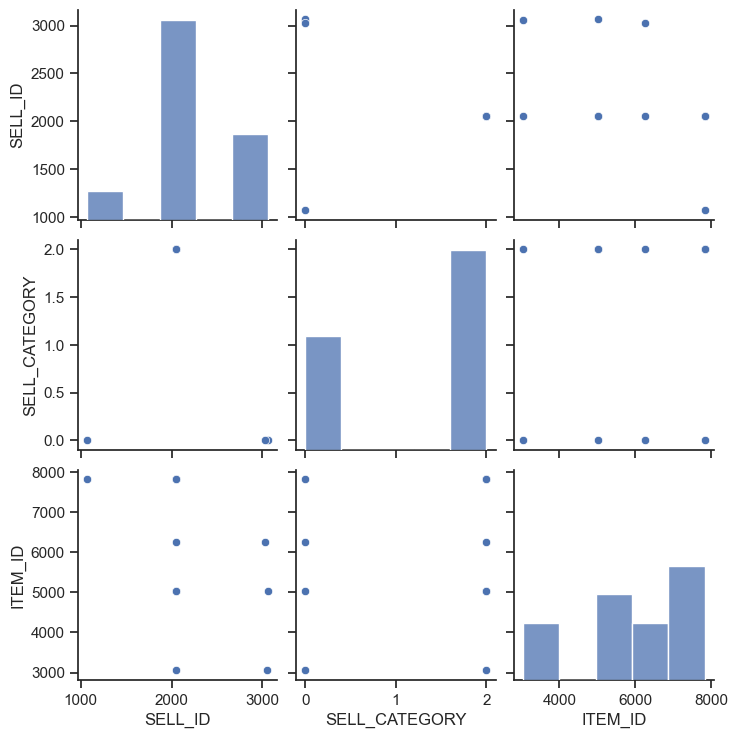

In [10]:
sns.pairplot(sold)

In [11]:
transaction.head()

CALENDAR_DATE  PRICE  QUANTITY  SELL_ID  SELL_CATEGORY
0      01/01/12  15.50        46     1070              0
1      01/01/12  12.73        22     2051              2
2      01/01/12  12.75        18     2052              2
3      01/01/12  12.60        30     2053              2
4      01/02/12  15.50        70     1070              0

In [12]:
transaction.describe()
transaction.describe(include=['O'])

PRICE     QUANTITY     SELL_ID  SELL_CATEGORY
count  5404.000000  5404.000000  5404.00000    5404.000000
mean     12.868729    44.335307  1806.50000       1.500000
std       1.563922    25.502597   425.25841       0.866106
min      10.120000     8.000000  1070.00000       0.000000
25%      11.530000    24.000000  1805.75000       1.500000
50%      12.640000    36.000000  2051.50000       2.000000
75%      13.557500    60.000000  2052.25000       2.000000
max      16.500000   124.000000  2053.00000       2.000000

CALENDAR_DATE
count           5404
unique          1348
top         03/01/13
freq              16

In [13]:
transaction[transaction.isnull().any(axis=1)]

Empty DataFrame
Columns: [CALENDAR_DATE, PRICE, QUANTITY, SELL_ID, SELL_CATEGORY]
Index: []

(array([ 360.,  509.,  629., 1351., 1082.,  122.,  389.,  240.,  482.,
         240.]),
 array([10.12 , 10.758, 11.396, 12.034, 12.672, 13.31 , 13.948, 14.586,
        15.224, 15.862, 16.5  ]),
 <BarContainer object of 10 artists>)

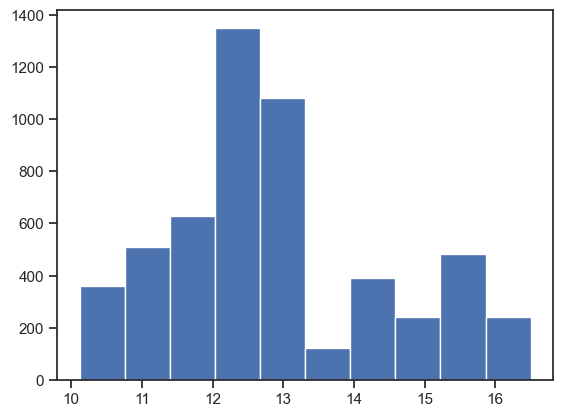

In [14]:
plt.hist(transaction.PRICE)

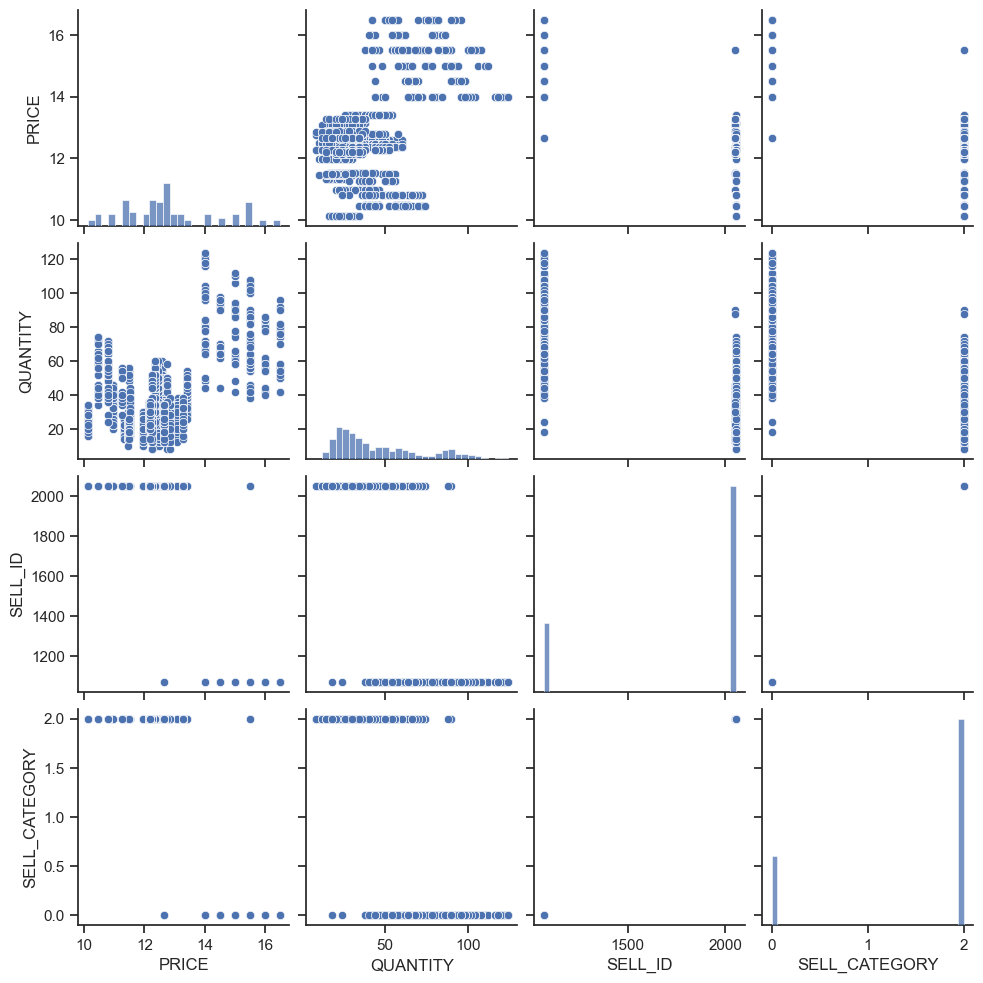

In [15]:
sns.pairplot(transaction)

In [16]:
date_info.head()

CALENDAR_DATE  YEAR   HOLIDAY  IS_WEEKEND  IS_SCHOOLBREAK  \
0        1/1/12  2012  New Year           1               0   
1        1/2/12  2012  New Year           0               0   
2        1/3/12  2012  New Year           0               0   
3        1/4/12  2012       NaN           0               0   
4        1/5/12  2012       NaN           0               0   

   AVERAGE_TEMPERATURE  IS_OUTDOOR  
0                 24.8           0  
1                 24.8           0  
2                 32.0           1  
3                 32.0           1  
4                 24.8           0

In [17]:
date_info.describe()
date_info.describe(include=['O'])

YEAR   IS_WEEKEND  IS_SCHOOLBREAK  AVERAGE_TEMPERATURE  \
count  1349.000000  1349.000000     1349.000000          1349.000000   
mean   2013.375093     0.285397        0.204596            56.326019   
std       1.073073     0.451771        0.403556            20.227597   
min    2012.000000     0.000000        0.000000            14.000000   
25%    2012.000000     0.000000        0.000000            35.600000   
50%    2013.000000     0.000000        0.000000            60.800000   
75%    2014.000000     1.000000        0.000000            75.200000   
max    2015.000000     1.000000        1.000000            87.800000   

        IS_OUTDOOR  
count  1349.000000  
mean      0.862120  
std       0.344902  
min       0.000000  
25%       1.000000  
50%       1.000000  
75%       1.000000  
max       1.000000

CALENDAR_DATE         HOLIDAY
count           1349             105
unique          1348               8
top           3/1/13  Luner New Year
freq               2              28

In [18]:
date_info.dtypes

CALENDAR_DATE           object
YEAR                     int64
HOLIDAY                 object
IS_WEEKEND               int64
IS_SCHOOLBREAK           int64
AVERAGE_TEMPERATURE    float64
IS_OUTDOOR               int64
dtype: object

In [19]:
date_info[date_info.isnull().any(axis=1)]

CALENDAR_DATE  YEAR HOLIDAY  IS_WEEKEND  IS_SCHOOLBREAK  \
3           1/4/12  2012     NaN           0               0   
4           1/5/12  2012     NaN           0               0   
5           1/6/12  2012     NaN           0               0   
6           1/7/12  2012     NaN           1               0   
7           1/8/12  2012     NaN           1               0   
8           1/9/12  2012     NaN           0               0   
9          1/10/12  2012     NaN           0               0   
10         1/11/12  2012     NaN           0               0   
11         1/12/12  2012     NaN           0               0   
12         1/13/12  2012     NaN           0               0   
13         1/14/12  2012     NaN           1               0   
14         1/15/12  2012     NaN           1               0   
15         1/16/12  2012     NaN           0               0   
16         1/17/12  2012     NaN           0               0   
17         1/18/12  2012     NaN           0               0   
18         1/19/12  2012     NaN           0               0   
19         1/20/12  2012     NaN           0               0   
20         1/21/12  2012     NaN           1               0   
21         1/22/12  2012     NaN           1               0   
22         1/23/12  2012     NaN           0               0   
23         1/24/12  2012     NaN           0               0   
24         1/25/12  2012     NaN           0               0   
25         1/26/12  2012     NaN           0               0   
26         1/27/12  2012     NaN           0               0   
27         1/28/12  2012     NaN           1               0   
28         1/29/12  2012     NaN           1               0   
29         1/30/12  2012     NaN           0               0   
30         1/31/12  2012     NaN           0               0   
31          2/1/12  2012     NaN           0               0   
39          2/9/12  2012     NaN           0               0   
40         2/10/12  2012     NaN           0               0   
41         2/11/12  2012     NaN           1               0   
42         2/12/12  2012     NaN           1               0   
43         2/13/12  2012     NaN           0               0   
44         2/14/12  2012     NaN           0               0   
45         2/15/12  2012     NaN           0               0   
46         2/16/12  2012     NaN           0               0   
47         2/17/12  2012     NaN           0               0   
48         2/18/12  2012     NaN           1               0   
49         2/19/12  2012     NaN           1               0   
50         2/20/12  2012     NaN           0               0   
51         2/21/12  2012     NaN           0               0   
52         2/22/12  2012     NaN           0               0   
53         2/23/12  2012     NaN           0               0   
54         2/24/12  2012     NaN           0               0   
55         2/25/12  2012     NaN           1               0   
56         2/26/12  2012     NaN           1               0   
57         2/27/12  2012     NaN           0               0   
58         2/28/12  2012     NaN           0               0   
59          3/1/12  2012     NaN           0               0   
60          3/2/12  2012     NaN           0               0   
61          3/3/12  2012     NaN           1               0   
62          3/4/12  2012     NaN           1               0   
63          3/5/12  2012     NaN           0               0   
64          3/6/12  2012     NaN           0               0   
65          3/7/12  2012     NaN           0               0   
66          3/8/12  2012     NaN           0               0   
67          3/9/12  2012     NaN           0               0   
68         3/10/12  2012     NaN           1               0   
69         3/11/12  2012     NaN           1               0   
70         3/12/12  2012     NaN           0               0   
71         3/13/12  2012     NaN     

In [20]:
date_info['HOLIDAY'] = date_info['HOLIDAY'].fillna("No Holiday")
date_info

CALENDAR_DATE  YEAR               HOLIDAY  IS_WEEKEND  IS_SCHOOLBREAK  \
0           1/1/12  2012              New Year           1               0   
1           1/2/12  2012              New Year           0               0   
2           1/3/12  2012              New Year           0               0   
3           1/4/12  2012            No Holiday           0               0   
4           1/5/12  2012            No Holiday           0               0   
5           1/6/12  2012            No Holiday           0               0   
6           1/7/12  2012            No Holiday           1               0   
7           1/8/12  2012            No Holiday           1               0   
8           1/9/12  2012            No Holiday           0               0   
9          1/10/12  2012            No Holiday           0               0   
10         1/11/12  2012            No Holiday           0               0   
11         1/12/12  2012            No Holiday           0               0   
12         1/13/12  2012            No Holiday           0               0   
13         1/14/12  2012            No Holiday           1               0   
14         1/15/12  2012            No Holiday           1               0   
15         1/16/12  2012            No Holiday           0               0   
16         1/17/12  2012            No Holiday           0               0   
17         1/18/12  2012            No Holiday           0               0   
18         1/19/12  2012            No Holiday           0               0   
19         1/20/12  2012            No Holiday           0               0   
20         1/21/12  2012            No Holiday           1               0   
21         1/22/12  2012            No Holiday           1               0   
22         1/23/12  2012            No Holiday           0               0   
23         1/24/12  2012            No Holiday           0               0   
24         1/25/12  2012            No Holiday           0               0   
25         1/26/12  2012            No Holiday           0               0   
26         1/27/12  2012            No Holiday           0               0   
27         1/28/12  2012            No Holiday           1               0   
28         1/29/12  2012            No Holiday           1               0   
29         1/30/12  2012            No Holiday           0               0   
30         1/31/12  2012            No Holiday           0               0   
31          2/1/12  2012            No Holiday           0               0   
32          2/2/12  2012        Luner New Year           0               0   
33          2/3/12  2012        Luner New Year           0               0   
34          2/4/12  2012        Luner New Year           1               0   
35          2/5/12  2012        Luner New Year           1               0   
36          2/6/12  2012        Luner New Year           0               0   
37          2/7/12  2012        Luner New Year           0               0   
38          2/8/12  2012        Luner New Year           0               0   
39          2/9/12  2012            No Holiday           0               0   
40         2/10/12  2012            No Holiday           0               0   
41         2/11/12  2012            No Holiday           1               0   
42         2/12/12  2012            No Holiday           1               0   
43         2/13/12  2012            No Holiday           0               0   
44         2/14/12  2012            No Holiday           0               0   
45         2/15/12  2012            No Holiday           0               0   
46         2/16/12  2012            No Holiday           0               0   
47         2/17/12  2012            No Holiday           0               0   
48         2/18/12  2012            No Holiday           1               0   
49         2/19/12  2012            No Holiday           1               0   
50         2/20/12  2012   

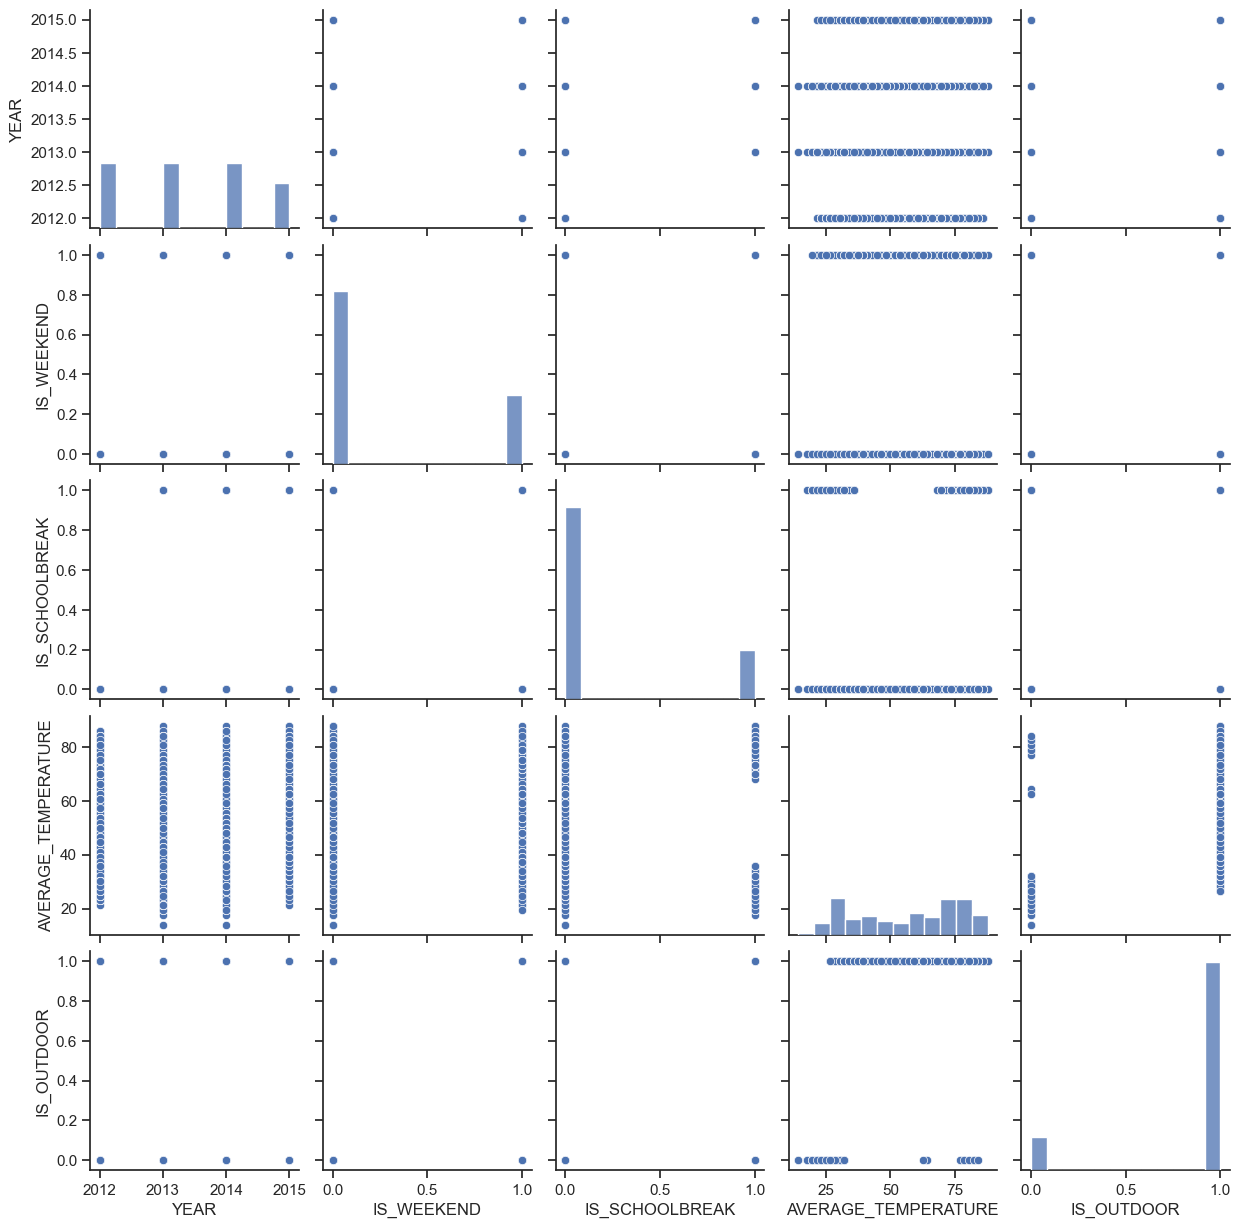

In [21]:
sns.pairplot(date_info)

In [22]:
np.unique(date_info['HOLIDAY'])

array(['Dragon Boat Festivel', 'Labor Day', 'Luner New Year',
       'Mid-Autumn Day', 'National Day', 'New Year', 'No Holiday',
       'Qing Ming Festival', 'WWII Celebration'], dtype=object)

In [23]:
date_info['HOLIDAY'].value_counts()

HOLIDAY
No Holiday              1244
Luner New Year            28
National Day              21
Labor Day                 12
Qing Ming Festival        12
Dragon Boat Festivel      12
New Year                  10
Mid-Autumn Day             7
WWII Celebration           3
Name: count, dtype: int64

In [24]:
date_info['CALENDAR_DATE'].min()

'1/1/12'

In [25]:
date_info['CALENDAR_DATE'].max()

'9/9/15'

In [26]:
date_info.shape

(1349, 7)

In [27]:
date_info[date_info.isnull().any(axis=1)]

Empty DataFrame
Columns: [CALENDAR_DATE, YEAR, HOLIDAY, IS_WEEKEND, IS_SCHOOLBREAK, AVERAGE_TEMPERATURE, IS_OUTDOOR]
Index: []

In [28]:
pd.concat([sold.SELL_ID, pd.get_dummies(sold.ITEM_NAME)], axis=1)

SELL_ID  BURGER  COFFEE   COKE  LEMONADE
0      1070    True   False  False     False
1      3055   False    True  False     False
2      3067   False   False   True     False
3      3028   False   False  False      True
4      2051    True   False  False     False
5      2051   False   False   True     False
6      2052    True   False  False     False
7      2052   False   False  False      True
8      2053    True   False  False     False
9      2053   False   False   True     False
10     2053   False    True  False     False

In [29]:
pd.concat([sold.SELL_ID, pd.get_dummies(sold.ITEM_NAME)], axis=1).groupby(sold.SELL_ID).sum()

SELL_ID  BURGER  COFFEE  COKE  LEMONADE
SELL_ID                                         
1070        1070       1       0     0         0
2051        4102       1       0     1         0
2052        4104       1       0     0         1
2053        6159       1       1     1         0
3028        3028       0       0     0         1
3055        3055       0       1     0         0
3067        3067       0       0     1         0

# Combined Data

In [30]:
merge_data1 = pd.merge(sold.drop(['ITEM_ID'], axis=1), transaction.drop(['SELL_CATEGORY'], axis=1), on= 'SELL_ID')
merge_data1.head(20)

unique_merge_data1 = merge_data1.groupby(['SELL_ID', 'SELL_CATEGORY', 'ITEM_NAME', 'CALENDAR_DATE', 'PRICE']).QUANTITY.sum()

SELL_ID  SELL_CATEGORY ITEM_NAME CALENDAR_DATE  PRICE  QUANTITY
0      1070              0    BURGER      01/01/12   15.5        46
1      1070              0    BURGER      01/02/12   15.5        70
2      1070              0    BURGER      01/03/12   15.5        62
3      1070              0    BURGER      01/04/12   15.5        88
4      1070              0    BURGER      01/05/12   15.5       104
5      1070              0    BURGER      01/06/12   15.5       100
6      1070              0    BURGER      01/07/12   15.5        70
7      1070              0    BURGER      01/08/12   15.5        70
8      1070              0    BURGER      01/09/12   15.5       106
9      1070              0    BURGER      01/10/12   15.5       108
10     1070              0    BURGER      01/11/12   15.5       104
11     1070              0    BURGER      01/12/12   15.5       102
12     1070              0    BURGER       1/13/12   15.5       100
13     1070              0    BURGER       1/14/12   15.5        74
14     1070              0    BURGER       1/15/12   15.5        60
15     1070              0    BURGER       1/16/12   15.5       104
16     1070              0    BURGER       1/17/12   15.5       106
17     1070              0    BURGER       1/18/12   15.5       108
18     1070              0    BURGER       1/19/12   15.5       100
19     1070              0    BURGER       1/20/12   15.5       100

In [31]:
unique_merge_data1.head(20)

SELL_ID  SELL_CATEGORY  ITEM_NAME  CALENDAR_DATE  PRICE
1070     0              BURGER     01/01/12       15.5      46
                                   01/01/13       15.5      60
                                   01/01/14       15.5      72
                                   01/01/15       14.0      66
                                   01/02/12       15.5      70
                                   01/02/13       15.5      68
                                   01/02/14       15.5      76
                                   01/02/15       14.0     102
                                   01/03/12       15.5      62
                                   01/03/13       15.5      70
                                   01/03/14       15.5      68
                                   01/03/15       14.0      68
                                   01/04/12       15.5      88
                                   01/04/13       15.5     100
                                   01/04/14       15.5      74

In [32]:
merge_data1.shape
intermediate_data =  unique_merge_data1.reset_index()

(10808, 6)

In [33]:
unique_merge_data1.shape

(10792,)

In [34]:
intermediate_data.head()

SELL_ID  SELL_CATEGORY ITEM_NAME CALENDAR_DATE  PRICE  QUANTITY
0     1070              0    BURGER      01/01/12   15.5        46
1     1070              0    BURGER      01/01/13   15.5        60
2     1070              0    BURGER      01/01/14   15.5        72
3     1070              0    BURGER      01/01/15   14.0        66
4     1070              0    BURGER      01/02/12   15.5        70

In [35]:
intermediate_data['CALENDAR_DATE'].min()

'01/01/12'

In [36]:
intermediate_data['CALENDAR_DATE'].max()

'9/30/14'

In [37]:
combined_data = pd.merge(intermediate_data, date_info, on= 'CALENDAR_DATE')
combined_data.head()

SELL_ID  SELL_CATEGORY ITEM_NAME CALENDAR_DATE  PRICE  QUANTITY  YEAR  \
0     1070              0    BURGER       1/13/12   15.5       100  2012   
1     1070              0    BURGER       1/13/13   15.5        70  2013   
2     1070              0    BURGER       1/13/14   15.5       104  2014   
3     1070              0    BURGER       1/13/15   14.0       116  2015   
4     1070              0    BURGER       1/14/12   15.5        74  2012   

      HOLIDAY  IS_WEEKEND  IS_SCHOOLBREAK  AVERAGE_TEMPERATURE  IS_OUTDOOR  
0  No Holiday           0               0                 26.6           0  
1  No Holiday           1               0                 30.2           0  
2  No Holiday           0               0                 28.4           0  
3  No Holiday           0               0                 28.4           0  
4  No Holiday           1               0                 23.0           0

In [38]:
combined_data.shape

(6696, 12)

In [39]:
combined_data[combined_data.isnull().any(axis=1)]

Empty DataFrame
Columns: [SELL_ID, SELL_CATEGORY, ITEM_NAME, CALENDAR_DATE, PRICE, QUANTITY, YEAR, HOLIDAY, IS_WEEKEND, IS_SCHOOLBREAK, AVERAGE_TEMPERATURE, IS_OUTDOOR]
Index: []

In [40]:
np.unique(combined_data.HOLIDAY)
np.unique(combined_data.IS_WEEKEND)
np.unique(combined_data.IS_SCHOOLBREAK)

array(['Dragon Boat Festivel', 'Labor Day', 'Luner New Year',
       'Mid-Autumn Day', 'No Holiday'], dtype=object)

array([0, 1])

array([0, 1])

In [41]:
bau_data = combined_data[(combined_data['HOLIDAY']=='No Holiday') & (combined_data['IS_SCHOOLBREAK']==0) & 
                            (combined_data['IS_WEEKEND']==0)]
bau_data.head()

SELL_ID  SELL_CATEGORY ITEM_NAME CALENDAR_DATE  PRICE  QUANTITY  YEAR  \
0     1070              0    BURGER       1/13/12   15.5       100  2012   
2     1070              0    BURGER       1/13/14   15.5       104  2014   
3     1070              0    BURGER       1/13/15   14.0       116  2015   
6     1070              0    BURGER       1/14/14   15.5        86  2014   
7     1070              0    BURGER       1/14/15   14.0       122  2015   

      HOLIDAY  IS_WEEKEND  IS_SCHOOLBREAK  AVERAGE_TEMPERATURE  IS_OUTDOOR  
0  No Holiday           0               0                 26.6           0  
2  No Holiday           0               0                 28.4           0  
3  No Holiday           0               0                 28.4           0  
6  No Holiday           0               0                 28.4           1  
7  No Holiday           0               0                 30.2           0

In [42]:
bau_data.shape

(3768, 12)

In [43]:
np.unique(bau_data.HOLIDAY)
np.unique(bau_data.IS_WEEKEND)
np.unique(bau_data.IS_SCHOOLBREAK)

array(['No Holiday'], dtype=object)

array([0])

array([0])

In [44]:
bau_data[bau_data['IS_WEEKEND']==1]

Empty DataFrame
Columns: [SELL_ID, SELL_CATEGORY, ITEM_NAME, CALENDAR_DATE, PRICE, QUANTITY, YEAR, HOLIDAY, IS_WEEKEND, IS_SCHOOLBREAK, AVERAGE_TEMPERATURE, IS_OUTDOOR]
Index: []

In [45]:
bau_data[bau_data['HOLIDAY']!='No Holiday']

Empty DataFrame
Columns: [SELL_ID, SELL_CATEGORY, ITEM_NAME, CALENDAR_DATE, PRICE, QUANTITY, YEAR, HOLIDAY, IS_WEEKEND, IS_SCHOOLBREAK, AVERAGE_TEMPERATURE, IS_OUTDOOR]
Index: []

# Exploratory Data Analysis for Combined

(array([1884.,    0.,    0.,  942.,    0.,    0.,  471.,    0.,    0.,
         471.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

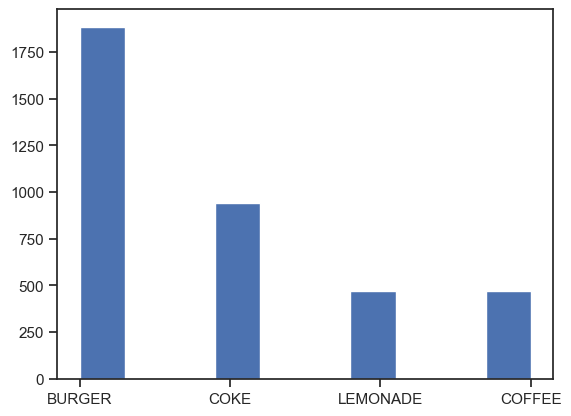

In [46]:
plt.hist(bau_data.ITEM_NAME)

(array([ 411.,  388.,  441., 1159.,  790.,  108.,  122.,  111.,  174.,
          64.]),
 array([10.12 , 10.758, 11.396, 12.034, 12.672, 13.31 , 13.948, 14.586,
        15.224, 15.862, 16.5  ]),
 <BarContainer object of 10 artists>)

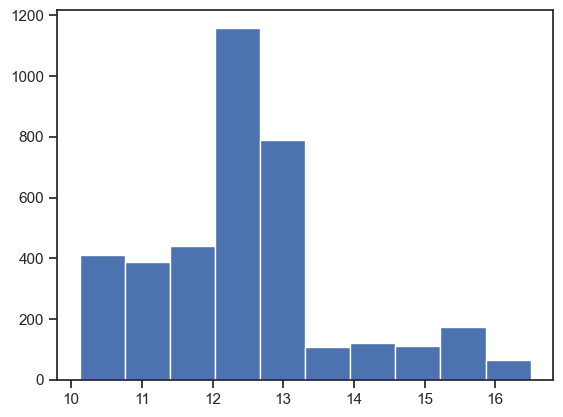

In [47]:
plt.hist(bau_data.PRICE)

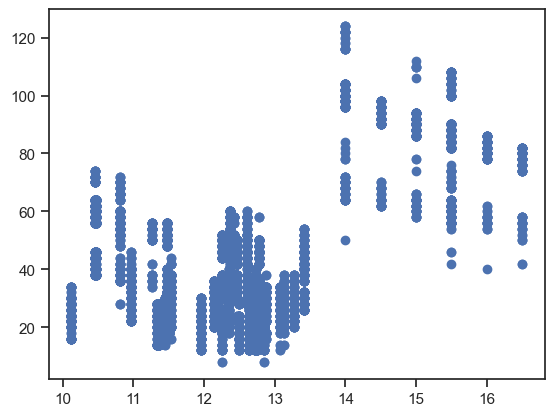

In [48]:
plt.scatter(combined_data.PRICE, combined_data.QUANTITY)

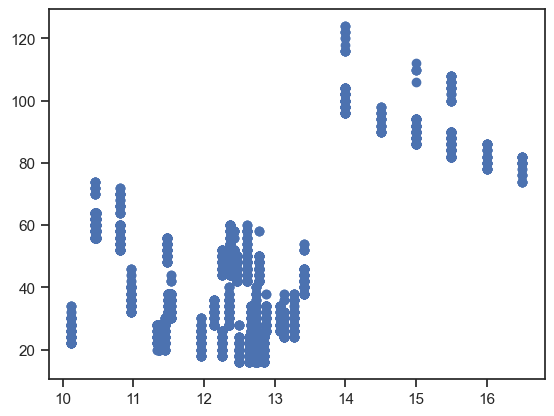

In [49]:
plt.scatter(bau_data.PRICE, bau_data.QUANTITY)

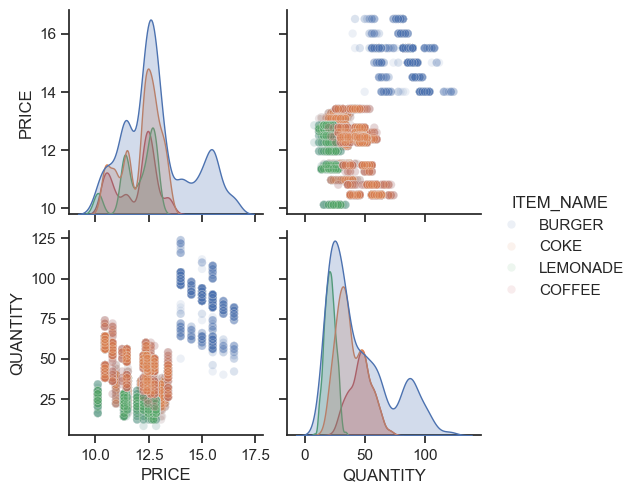

In [50]:
sns.pairplot(combined_data[['PRICE', 'QUANTITY', 'ITEM_NAME']],hue = 'ITEM_NAME', plot_kws={'alpha':0.1})

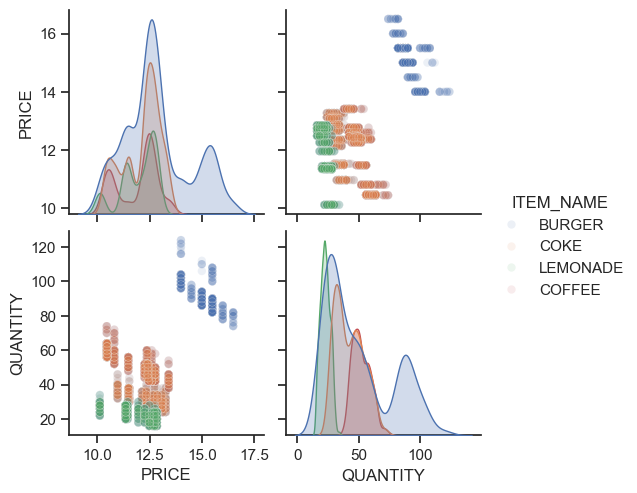

In [51]:
sns.pairplot(bau_data[['PRICE', 'QUANTITY', 'ITEM_NAME']], hue = 'ITEM_NAME', plot_kws={'alpha':0.1})

# Uncovering facets of data with visualization

SELL_ID  SELL_CATEGORY ITEM_NAME CALENDAR_DATE  PRICE  QUANTITY  YEAR  \
0     1070              0    BURGER       1/13/12   15.5       100  2012   
1     1070              0    BURGER       1/13/13   15.5        70  2013   
2     1070              0    BURGER       1/13/14   15.5       104  2014   
3     1070              0    BURGER       1/13/15   14.0       116  2015   
4     1070              0    BURGER       1/14/12   15.5        74  2012   

      HOLIDAY  IS_WEEKEND  IS_SCHOOLBREAK  AVERAGE_TEMPERATURE  IS_OUTDOOR  
0  No Holiday           0               0                 26.6           0  
1  No Holiday           1               0                 30.2           0  
2  No Holiday           0               0                 28.4           0  
3  No Holiday           0               0                 28.4           0  
4  No Holiday           1               0                 23.0           0

(3348, 12)

SELL_ID  SELL_CATEGORY        PRICE     QUANTITY         YEAR  \
count  3348.000000    3348.000000  3348.000000  3348.000000  3348.000000   
mean   1806.500000       1.500000    12.858572    44.974313  2013.351254   
std     425.282579       0.866155     1.565046    25.747886     1.062567   
min    1070.000000       0.000000    10.120000     8.000000  2012.000000   
25%    1805.750000       1.500000    11.530000    24.000000  2012.000000   
50%    2051.500000       2.000000    12.640000    36.000000  2013.000000   
75%    2052.250000       2.000000    13.557500    60.000000  2014.000000   
max    2053.000000       2.000000    16.500000   124.000000  2015.000000   

        IS_WEEKEND  IS_SCHOOLBREAK  AVERAGE_TEMPERATURE   IS_OUTDOOR  
count  3348.000000     3348.000000          3348.000000  3348.000000  
mean      0.284349        0.200717            56.255914     0.878136  
std       0.451171        0.400596            19.996348     0.327177  
min       0.000000        0.000000            14.000000     0.000000  
25%       0.000000        0.000000            35.600000     1.000000  
50%       0.000000        0.000000            59.000000     1.000000  
75%       1.000000        0.000000            75.200000     1.000000  
max       1.000000        1.000000            87.800000     1.000000

<Axes: xlabel='PRICE', ylabel='QUANTITY'>

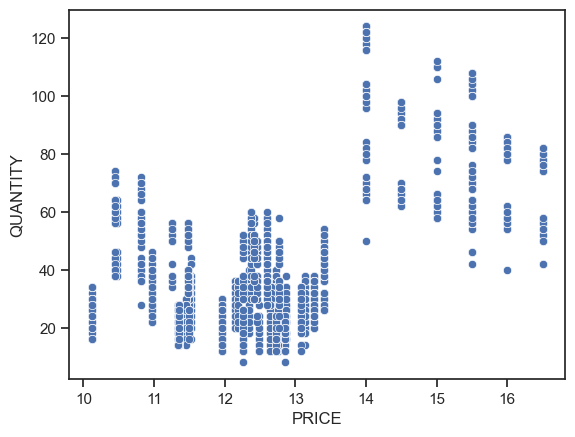

In [52]:
#Facets of burger
burger = combined_data[combined_data['ITEM_NAME'] == 'BURGER']
burger.head()
burger.shape
burger.describe()
sns.scatterplot(x=burger.PRICE, y=burger.QUANTITY)

<Axes: xlabel='PRICE', ylabel='QUANTITY'>

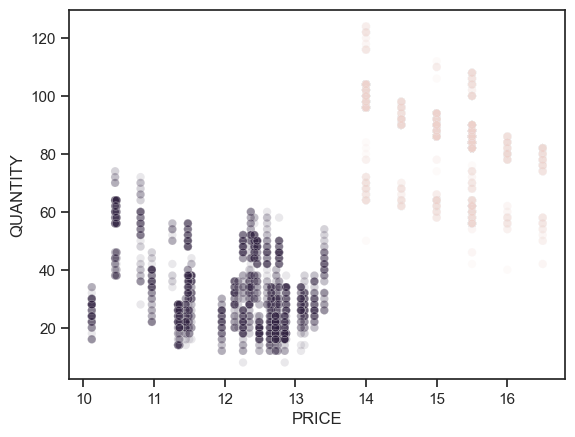

In [53]:
burger = combined_data[combined_data['ITEM_NAME'] == 'BURGER']
sns.scatterplot(data = burger, x = burger.PRICE, y = burger.QUANTITY , hue = 'SELL_ID', legend=False, alpha = 0.1)

In [54]:
np.unique(combined_data.SELL_ID)

array([1070, 2051, 2052, 2053])

In [55]:
np.unique(combined_data.SELL_CATEGORY)

array([0, 2])

SELL_ID  SELL_CATEGORY ITEM_NAME CALENDAR_DATE  PRICE  QUANTITY  YEAR  \
0     1070              0    BURGER       1/13/12   15.5       100  2012   
1     1070              0    BURGER       1/13/13   15.5        70  2013   
2     1070              0    BURGER       1/13/14   15.5       104  2014   
3     1070              0    BURGER       1/13/15   14.0       116  2015   
4     1070              0    BURGER       1/14/12   15.5        74  2012   

      HOLIDAY  IS_WEEKEND  IS_SCHOOLBREAK  AVERAGE_TEMPERATURE  IS_OUTDOOR  
0  No Holiday           0               0                 26.6           0  
1  No Holiday           1               0                 30.2           0  
2  No Holiday           0               0                 28.4           0  
3  No Holiday           0               0                 28.4           0  
4  No Holiday           1               0                 23.0           0

SELL_ID  SELL_CATEGORY       PRICE    QUANTITY         YEAR  \
count    837.0          837.0  837.000000  837.000000   837.000000   
mean    1070.0            0.0   15.154719   82.685783  2013.351254   
std        0.0            0.0    0.744770   15.981238     1.063043   
min     1070.0            0.0   14.000000   40.000000  2012.000000   
25%     1070.0            0.0   14.500000   68.000000  2012.000000   
50%     1070.0            0.0   15.500000   86.000000  2013.000000   
75%     1070.0            0.0   15.500000   92.000000  2014.000000   
max     1070.0            0.0   16.500000  124.000000  2015.000000   

       IS_WEEKEND  IS_SCHOOLBREAK  AVERAGE_TEMPERATURE  IS_OUTDOOR  
count  837.000000      837.000000           837.000000  837.000000  
mean     0.284349        0.200717            56.255914    0.878136  
std      0.451373        0.400776            20.005316    0.327324  
min      0.000000        0.000000            14.000000    0.000000  
25%      0.000000        0.000000            35.600000    1.000000  
50%      0.000000        0.000000            59.000000    1.000000  
75%      1.000000        0.000000            75.200000    1.000000  
max      1.000000        1.000000            87.800000    1.000000

<Axes: xlabel='PRICE', ylabel='QUANTITY'>

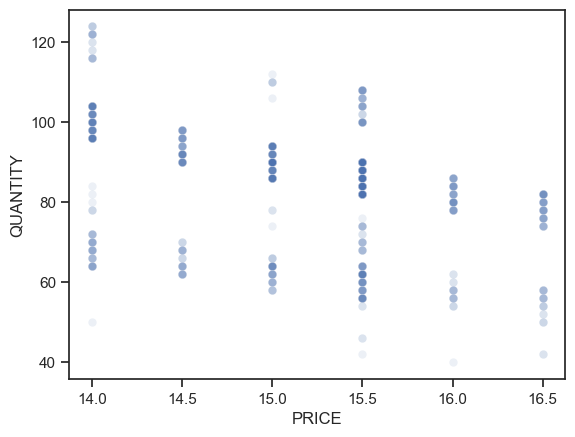

In [56]:
burger_1070 = combined_data[(combined_data['ITEM_NAME'] == 'BURGER') & (combined_data['SELL_ID'] ==1070)]
burger_1070.head()
burger_1070.describe()
sns.scatterplot(data = burger_1070, x = burger_1070.PRICE, y = burger_1070.QUANTITY, alpha = 0.1)

# Modelling

                            OLS Regression Results                            
Dep. Variable:               QUANTITY   R-squared:                       0.156
Model:                            OLS   Adj. R-squared:                  0.155
Method:                 Least Squares   F-statistic:                     153.9
Date:                Thu, 14 Nov 2024   Prob (F-statistic):           1.45e-32
Time:                        18:44:19   Log-Likelihood:                -3436.0
No. Observations:                 837   AIC:                             6876.
Df Residuals:                     835   BIC:                             6885.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    210.9859     10.353     20.379      0.0

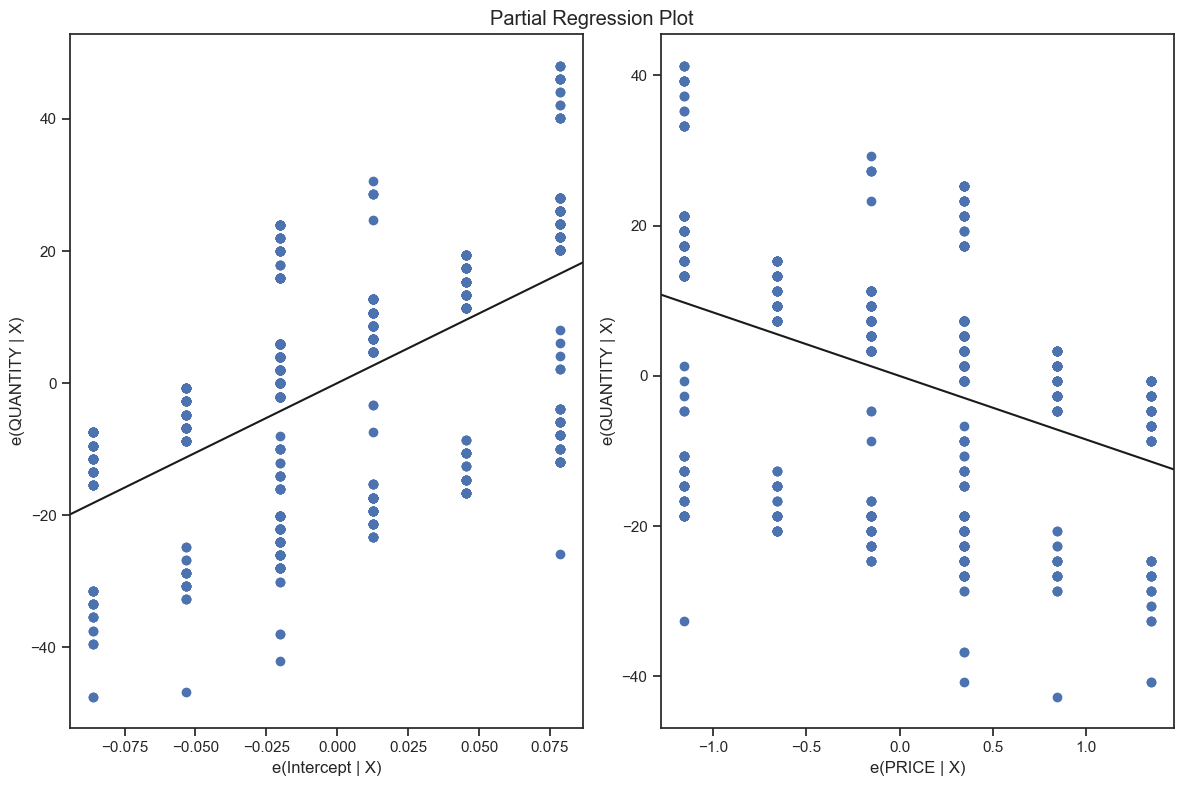

In [57]:
burger_model = ols("QUANTITY ~ PRICE", data=burger_1070).fit()
print(burger_model.summary())
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_partregress_grid(burger_model, fig=fig)

SELL_ID  SELL_CATEGORY ITEM_NAME CALENDAR_DATE  PRICE  QUANTITY  YEAR  \
0     1070              0    BURGER       1/13/12   15.5       100  2012   
2     1070              0    BURGER       1/13/14   15.5       104  2014   
3     1070              0    BURGER       1/13/15   14.0       116  2015   
6     1070              0    BURGER       1/14/14   15.5        86  2014   
7     1070              0    BURGER       1/14/15   14.0       122  2015   

      HOLIDAY  IS_WEEKEND  IS_SCHOOLBREAK  AVERAGE_TEMPERATURE  IS_OUTDOOR  
0  No Holiday           0               0                 26.6           0  
2  No Holiday           0               0                 28.4           0  
3  No Holiday           0               0                 28.4           0  
6  No Holiday           0               0                 28.4           1  
7  No Holiday           0               0                 30.2           0

(1884, 12)

SELL_ID  SELL_CATEGORY        PRICE     QUANTITY         YEAR  \
count  1884.000000    1884.000000  1884.000000  1884.000000  1884.000000   
mean   1806.500000       1.500000    12.830340    49.562633  2013.186837   
std     425.331956       0.866255     1.567257    27.309516     1.058620   
min    1070.000000       0.000000    10.120000    16.000000  2012.000000   
25%    1805.750000       1.500000    11.530000    28.000000  2012.000000   
50%    2051.500000       2.000000    12.640000    40.000000  2013.000000   
75%    2052.250000       2.000000    13.557500    74.000000  2014.000000   
max    2053.000000       2.000000    16.500000   124.000000  2015.000000   

       IS_WEEKEND  IS_SCHOOLBREAK  AVERAGE_TEMPERATURE   IS_OUTDOOR  
count      1884.0          1884.0          1884.000000  1884.000000  
mean          0.0             0.0            53.691720     0.883227  
std           0.0             0.0            18.721922     0.321235  
min           0.0             0.0            14.000000     0.000000  
25%           0.0             0.0            35.600000     1.000000  
50%           0.0             0.0            53.600000     1.000000  
75%           0.0             0.0            71.600000     1.000000  
max           0.0             0.0            87.800000     1.000000

<Axes: xlabel='PRICE', ylabel='QUANTITY'>

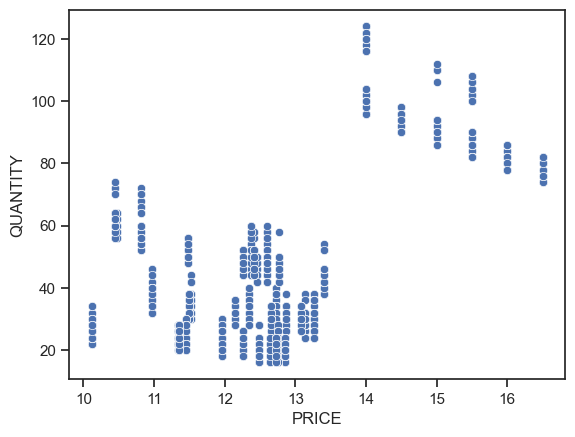

In [58]:
burger = bau_data[bau_data['ITEM_NAME'] == 'BURGER']
burger.head()
burger.shape
burger.describe()
sns.scatterplot(x = burger.PRICE, y = burger.QUANTITY)

<Axes: xlabel='PRICE', ylabel='QUANTITY'>

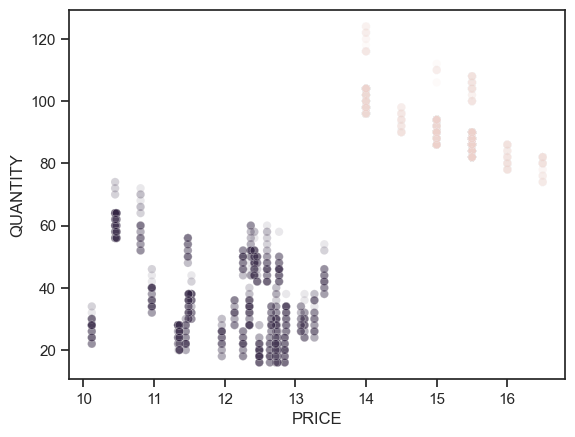

In [59]:
burger = bau_data[bau_data['ITEM_NAME'] =='BURGER']
sns.scatterplot(data=burger, x =burger.PRICE, y=burger.QUANTITY, hue= 'SELL_ID', legend=False, alpha=0.1)

In [60]:
np.unique(bau_data.SELL_ID)

array([1070, 2051, 2052, 2053])

In [61]:
np.unique(bau_data.SELL_CATEGORY)

array([0, 2])

SELL_ID  SELL_CATEGORY ITEM_NAME CALENDAR_DATE  PRICE  QUANTITY  YEAR  \
0     1070              0    BURGER       1/13/12   15.5       100  2012   
2     1070              0    BURGER       1/13/14   15.5       104  2014   
3     1070              0    BURGER       1/13/15   14.0       116  2015   
6     1070              0    BURGER       1/14/14   15.5        86  2014   
7     1070              0    BURGER       1/14/15   14.0       122  2015   

      HOLIDAY  IS_WEEKEND  IS_SCHOOLBREAK  AVERAGE_TEMPERATURE  IS_OUTDOOR  
0  No Holiday           0               0                 26.6           0  
2  No Holiday           0               0                 28.4           0  
3  No Holiday           0               0                 28.4           0  
6  No Holiday           0               0                 28.4           1  
7  No Holiday           0               0                 30.2           0

SELL_ID  SELL_CATEGORY       PRICE    QUANTITY         YEAR  \
count    471.0          471.0  471.000000  471.000000   471.000000   
mean    1070.0            0.0   15.124204   91.622081  2013.186837   
std        0.0            0.0    0.705577    9.437897     1.059464   
min     1070.0            0.0   14.000000   74.000000  2012.000000   
25%     1070.0            0.0   14.500000   86.000000  2012.000000   
50%     1070.0            0.0   15.500000   90.000000  2013.000000   
75%     1070.0            0.0   15.500000   98.000000  2014.000000   
max     1070.0            0.0   16.500000  124.000000  2015.000000   

       IS_WEEKEND  IS_SCHOOLBREAK  AVERAGE_TEMPERATURE  IS_OUTDOOR  
count       471.0           471.0           471.000000  471.000000  
mean          0.0             0.0            53.691720    0.883227  
std           0.0             0.0            18.736854    0.321491  
min           0.0             0.0            14.000000    0.000000  
25%           0.0             0.0            35.600000    1.000000  
50%           0.0             0.0            53.600000    1.000000  
75%           0.0             0.0            70.700000    1.000000  
max           0.0             0.0            87.800000    1.000000

<Axes: xlabel='PRICE', ylabel='QUANTITY'>

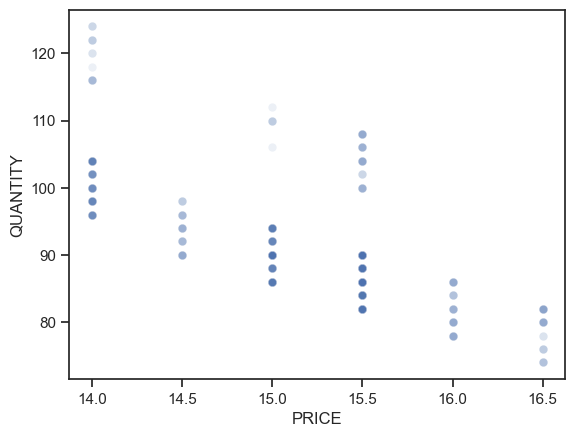

In [62]:
burger_1070 = bau_data[(bau_data['ITEM_NAME'] =='BURGER') & (bau_data['SELL_ID'] == 1070)]

burger_1070.head()
burger_1070.describe()
sns.scatterplot(data= burger_1070,  x =burger_1070.PRICE, y= burger_1070.QUANTITY, alpha=0.1)

                            OLS Regression Results                            
Dep. Variable:               QUANTITY   R-squared:                       0.486
Model:                            OLS   Adj. R-squared:                  0.485
Method:                 Least Squares   F-statistic:                     444.2
Date:                Thu, 14 Nov 2024   Prob (F-statistic):           7.16e-70
Time:                        18:44:21   Log-Likelihood:                -1568.2
No. Observations:                 471   AIC:                             3140.
Df Residuals:                     469   BIC:                             3149.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    232.7193      6.702     34.726      0.0

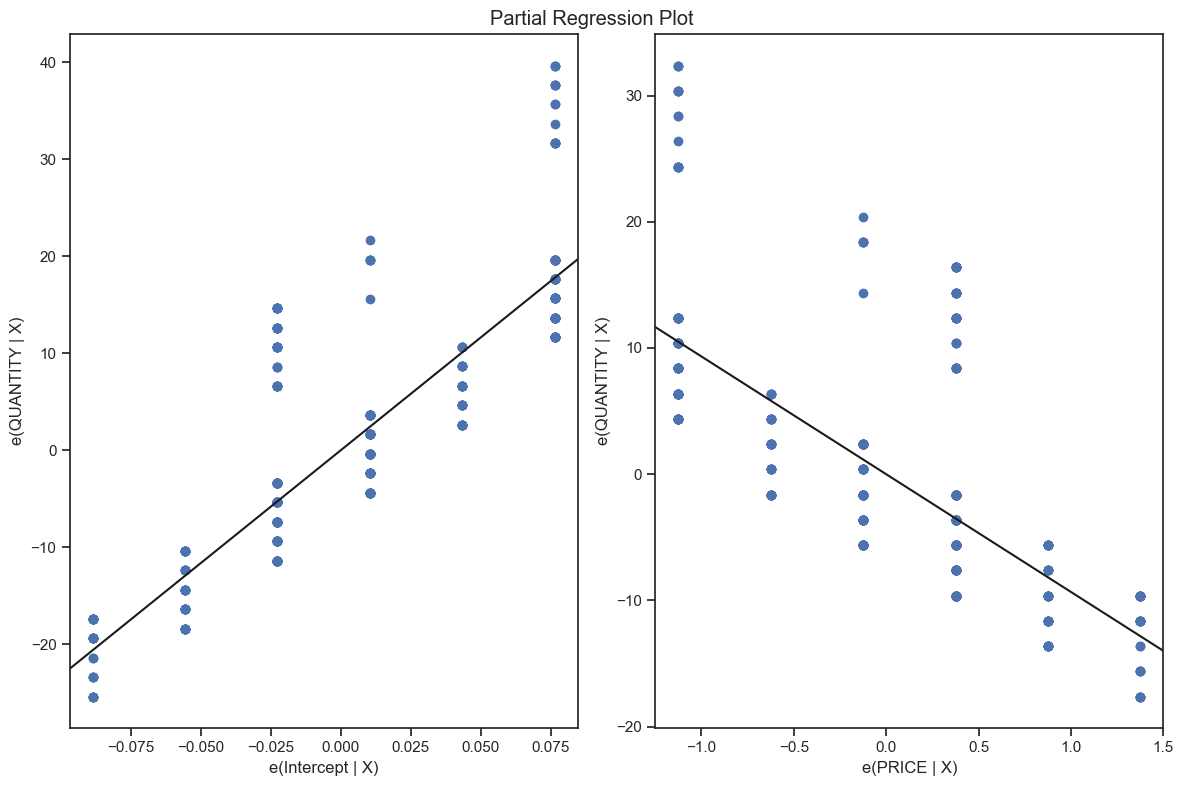

In [63]:
burger_model = ols('QUANTITY ~ PRICE', data=burger_1070).fit()
print(burger_model.summary())
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_partregress_grid(burger_model, fig=fig)

In [64]:
bau_data.head()

SELL_ID  SELL_CATEGORY ITEM_NAME CALENDAR_DATE  PRICE  QUANTITY  YEAR  \
0     1070              0    BURGER       1/13/12   15.5       100  2012   
2     1070              0    BURGER       1/13/14   15.5       104  2014   
3     1070              0    BURGER       1/13/15   14.0       116  2015   
6     1070              0    BURGER       1/14/14   15.5        86  2014   
7     1070              0    BURGER       1/14/15   14.0       122  2015   

      HOLIDAY  IS_WEEKEND  IS_SCHOOLBREAK  AVERAGE_TEMPERATURE  IS_OUTDOOR  
0  No Holiday           0               0                 26.6           0  
2  No Holiday           0               0                 28.4           0  
3  No Holiday           0               0                 28.4           0  
6  No Holiday           0               0                 28.4           1  
7  No Holiday           0               0                 30.2           0

In [65]:
bau2_data = combined_data[(combined_data['HOLIDAY'] =='No Holiday') & (combined_data['IS_SCHOOLBREAK'] ==0) & 
                            (combined_data['IS_WEEKEND'] ==1) & (combined_data['IS_OUTDOOR'] ==1)]

SELL_ID  SELL_CATEGORY ITEM_NAME CALENDAR_DATE  PRICE  QUANTITY  YEAR  \
8      1070              0    BURGER       1/15/12   15.5        60  2012   
23     1070              0    BURGER       1/18/15   14.0        68  2015   
26     1070              0    BURGER       1/19/14   15.5        56  2014   
60     1070              0    BURGER       1/28/12   15.5        62  2012   
81     1070              0    BURGER      10/11/14   15.5        60  2014   

       HOLIDAY  IS_WEEKEND  IS_SCHOOLBREAK  AVERAGE_TEMPERATURE  IS_OUTDOOR  
8   No Holiday           1               0                 32.0           1  
23  No Holiday           1               0                 33.8           1  
26  No Holiday           1               0                 30.2           1  
60  No Holiday           1               0                 32.0           1  
81  No Holiday           1               0                 62.6           1

SELL_ID  SELL_CATEGORY       PRICE    QUANTITY         YEAR  \
count    164.0          164.0  164.000000  164.000000   164.000000   
mean    1070.0            0.0   15.143293   61.707317  2013.195122   
std        0.0            0.0    0.695660    4.568464     1.084628   
min     1070.0            0.0   14.000000   50.000000  2012.000000   
25%     1070.0            0.0   14.875000   58.000000  2012.000000   
50%     1070.0            0.0   15.500000   62.000000  2013.000000   
75%     1070.0            0.0   15.500000   64.000000  2014.000000   
max     1070.0            0.0   16.500000   72.000000  2015.000000   

       IS_WEEKEND  IS_SCHOOLBREAK  AVERAGE_TEMPERATURE  IS_OUTDOOR  
count       164.0           164.0           164.000000       164.0  
mean          1.0             0.0            57.408537         1.0  
std           0.0             0.0            15.850085         0.0  
min           1.0             0.0            26.600000         1.0  
25%           1.0             0.0            42.800000         1.0  
50%           1.0             0.0            59.000000         1.0  
75%           1.0             0.0            71.600000         1.0  
max           1.0             0.0            84.200000         1.0

<Axes: xlabel='PRICE', ylabel='QUANTITY'>

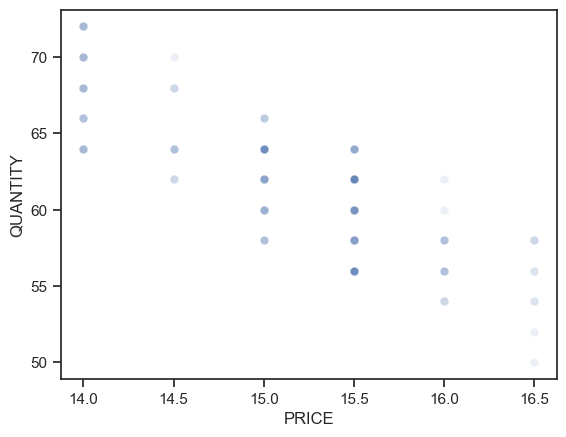

In [66]:
burger_1070 = bau2_data[(bau2_data['ITEM_NAME'] == 'BURGER') & (bau2_data['SELL_ID'] == 1070)]
burger_1070.head()
burger_1070.describe()
sns.scatterplot(data= burger_1070, x = burger_1070.PRICE, y= burger_1070.QUANTITY, alpha= 0.1)

                            OLS Regression Results                            
Dep. Variable:               QUANTITY   R-squared:                       0.664
Model:                            OLS   Adj. R-squared:                  0.662
Method:                 Least Squares   F-statistic:                     320.1
Date:                Thu, 14 Nov 2024   Prob (F-statistic):           3.29e-40
Time:                        18:44:23   Log-Likelihood:                -391.92
No. Observations:                 164   AIC:                             787.8
Df Residuals:                     162   BIC:                             794.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    142.7431      4.534     31.484      0.0

<Figure size 1200x800 with 0 Axes>

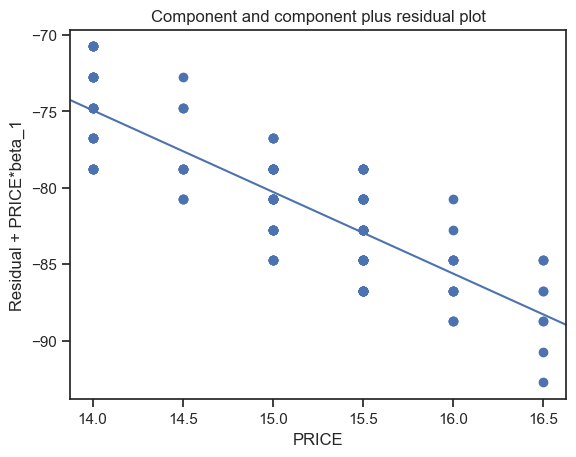

In [67]:
burger_model = ols("QUANTITY ~ PRICE", data=  burger_1070).fit()
print(burger_model.summary())
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_ccpr(burger_model, "PRICE")

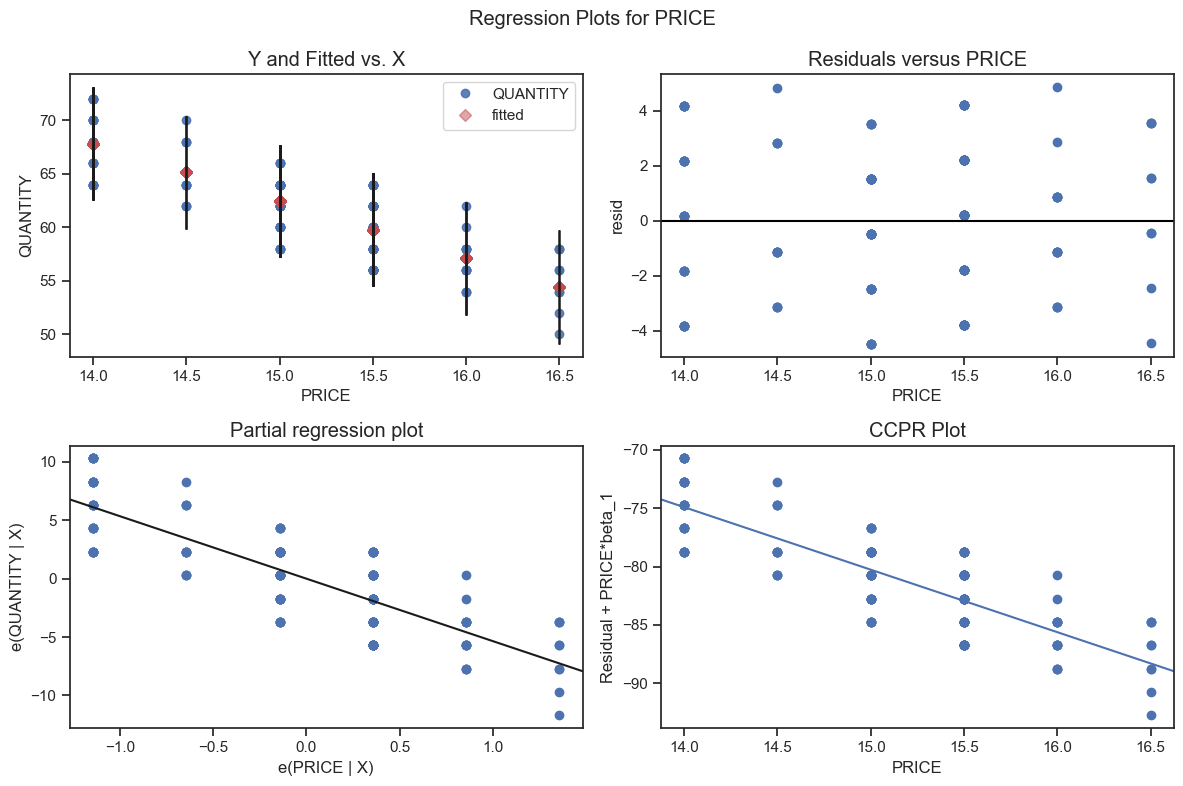

In [68]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(burger_model, "PRICE", fig=fig)

# Applying Model on All Products

SELL_ID  SELL_CATEGORY ITEM_NAME CALENDAR_DATE  PRICE  QUANTITY  YEAR  \
837     2051              2    BURGER       1/13/12  12.73        40  2012   
838     2051              2    BURGER       1/13/13  13.13        26  2013   
839     2051              2    BURGER       1/13/14  13.27        38  2014   
840     2051              2    BURGER       1/13/15  11.53        38  2015   
841     2051              2    BURGER       1/14/12  12.73        24  2012   

        HOLIDAY  IS_WEEKEND  IS_SCHOOLBREAK  AVERAGE_TEMPERATURE  IS_OUTDOOR  
837  No Holiday           0               0                 26.6           0  
838  No Holiday           1               0                 30.2           0  
839  No Holiday           0               0                 28.4           0  
840  No Holiday           0               0                 28.4           0  
841  No Holiday           1               0                 23.0           0

SELL_ID  SELL_CATEGORY       PRICE    QUANTITY         YEAR  \
count    837.0          837.0  837.000000  837.000000   837.000000   
mean    2051.0            2.0   12.368017   29.498208  2013.351254   
std        0.0            0.0    0.726329    5.782878     1.063043   
min     2051.0            2.0   10.970000   12.000000  2012.000000   
25%     2051.0            2.0   11.530000   26.000000  2012.000000   
50%     2051.0            2.0   12.660000   30.000000  2013.000000   
75%     2051.0            2.0   13.080000   34.000000  2014.000000   
max     2051.0            2.0   13.270000   46.000000  2015.000000   

       IS_WEEKEND  IS_SCHOOLBREAK  AVERAGE_TEMPERATURE  IS_OUTDOOR  
count  837.000000      837.000000           837.000000  837.000000  
mean     0.284349        0.200717            56.255914    0.878136  
std      0.451373        0.400776            20.005316    0.327324  
min      0.000000        0.000000            14.000000    0.000000  
25%      0.000000        0.000000            35.600000    1.000000  
50%      0.000000        0.000000            59.000000    1.000000  
75%      1.000000        0.000000            75.200000    1.000000  
max      1.000000        1.000000            87.800000    1.000000

<Axes: xlabel='PRICE', ylabel='QUANTITY'>

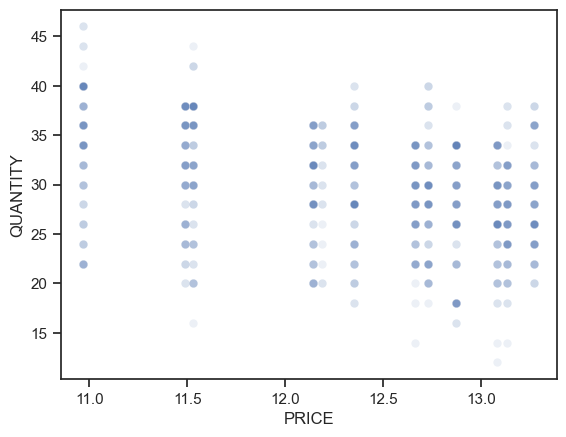

In [69]:
burger_2051 = combined_data[(combined_data['ITEM_NAME'] == 'BURGER') & (combined_data['SELL_ID'] ==2051)]

burger_2051.head()
burger_2051.describe()
sns.scatterplot(data= burger_2051, x = burger_2051.PRICE, y= burger_2051.QUANTITY, alpha=0.1)

                            OLS Regression Results                            
Dep. Variable:               QUANTITY   R-squared:                       0.130
Model:                            OLS   Adj. R-squared:                  0.129
Method:                 Least Squares   F-statistic:                     124.7
Date:                Thu, 14 Nov 2024   Prob (F-statistic):           4.45e-27
Time:                        18:44:25   Log-Likelihood:                -2597.8
No. Observations:                 837   AIC:                             5200.
Df Residuals:                     835   BIC:                             5209.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     64.9906      3.184     20.411      0.0

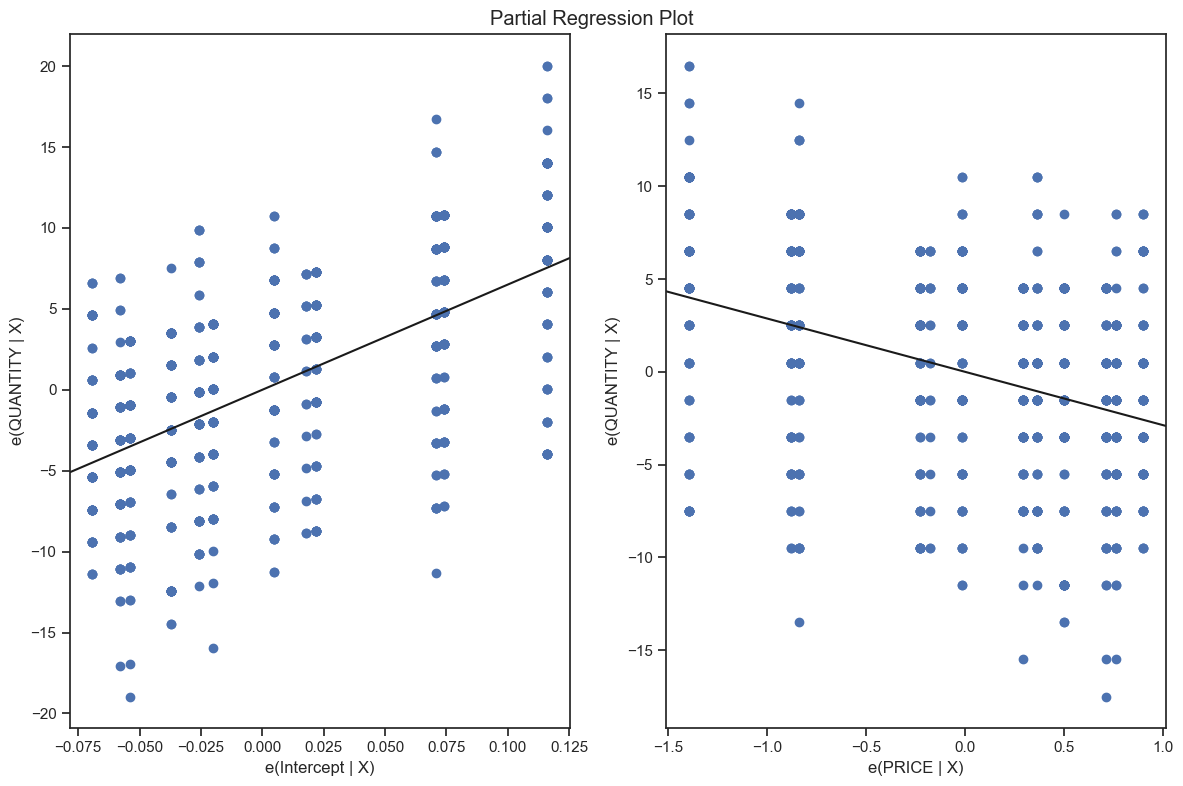

In [70]:
burger_model = ols('QUANTITY ~ PRICE', data=burger_2051).fit()
print(burger_model.summary())
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_partregress_grid(burger_model, fig=fig)

SELL_ID  SELL_CATEGORY ITEM_NAME CALENDAR_DATE  PRICE  QUANTITY  YEAR  \
1674     2051              2      COKE       1/13/12  12.73        40  2012   
1675     2051              2      COKE       1/13/13  13.13        26  2013   
1676     2051              2      COKE       1/13/14  13.27        38  2014   
1677     2051              2      COKE       1/13/15  11.53        38  2015   
1678     2051              2      COKE       1/14/12  12.73        24  2012   

         HOLIDAY  IS_WEEKEND  IS_SCHOOLBREAK  AVERAGE_TEMPERATURE  IS_OUTDOOR  
1674  No Holiday           0               0                 26.6           0  
1675  No Holiday           1               0                 30.2           0  
1676  No Holiday           0               0                 28.4           0  
1677  No Holiday           0               0                 28.4           0  
1678  No Holiday           1               0                 23.0           0

(1674, 12)

SELL_ID  SELL_CATEGORY        PRICE     QUANTITY         YEAR  \
count  1674.000000         1674.0  1674.000000  1674.000000  1674.000000   
mean   2052.000000            2.0    12.151326    38.150538  2013.351254   
std       1.000299            0.0     0.871405    11.861375     1.062726   
min    2051.000000            2.0    10.450000    12.000000  2012.000000   
25%    2051.000000            2.0    11.490000    30.000000  2012.000000   
50%    2052.000000            2.0    12.370000    36.000000  2013.000000   
75%    2053.000000            2.0    12.770000    48.000000  2014.000000   
max    2053.000000            2.0    13.410000    74.000000  2015.000000   

        IS_WEEKEND  IS_SCHOOLBREAK  AVERAGE_TEMPERATURE   IS_OUTDOOR  
count  1674.000000     1674.000000          1674.000000  1674.000000  
mean      0.284349        0.200717            56.255914     0.878136  
std       0.451239        0.400656            19.999336     0.327226  
min       0.000000        0.000000            14.000000     0.000000  
25%       0.000000        0.000000            35.600000     1.000000  
50%       0.000000        0.000000            59.000000     1.000000  
75%       1.000000        0.000000            75.200000     1.000000  
max       1.000000        1.000000            87.800000     1.000000

<Axes: xlabel='PRICE', ylabel='QUANTITY'>

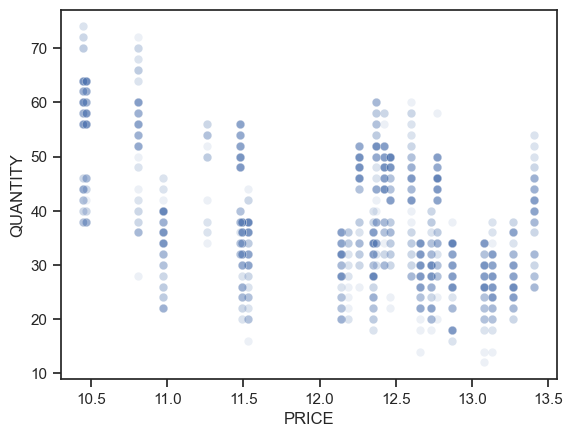

In [71]:
coke = combined_data[combined_data['ITEM_NAME'] == 'COKE']
coke.head()
coke.shape
coke.describe()
sns.scatterplot(x = coke.PRICE, y= coke.QUANTITY, alpha=0.1)

                            OLS Regression Results                            
Dep. Variable:               QUANTITY   R-squared:                       0.246
Model:                            OLS   Adj. R-squared:                  0.245
Method:                 Least Squares   F-statistic:                     544.2
Date:                Thu, 14 Nov 2024   Prob (F-statistic):          1.94e-104
Time:                        18:44:27   Log-Likelihood:                -6279.2
No. Observations:                1674   AIC:                         1.256e+04
Df Residuals:                    1672   BIC:                         1.257e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    120.1140      3.522     34.100      0.0

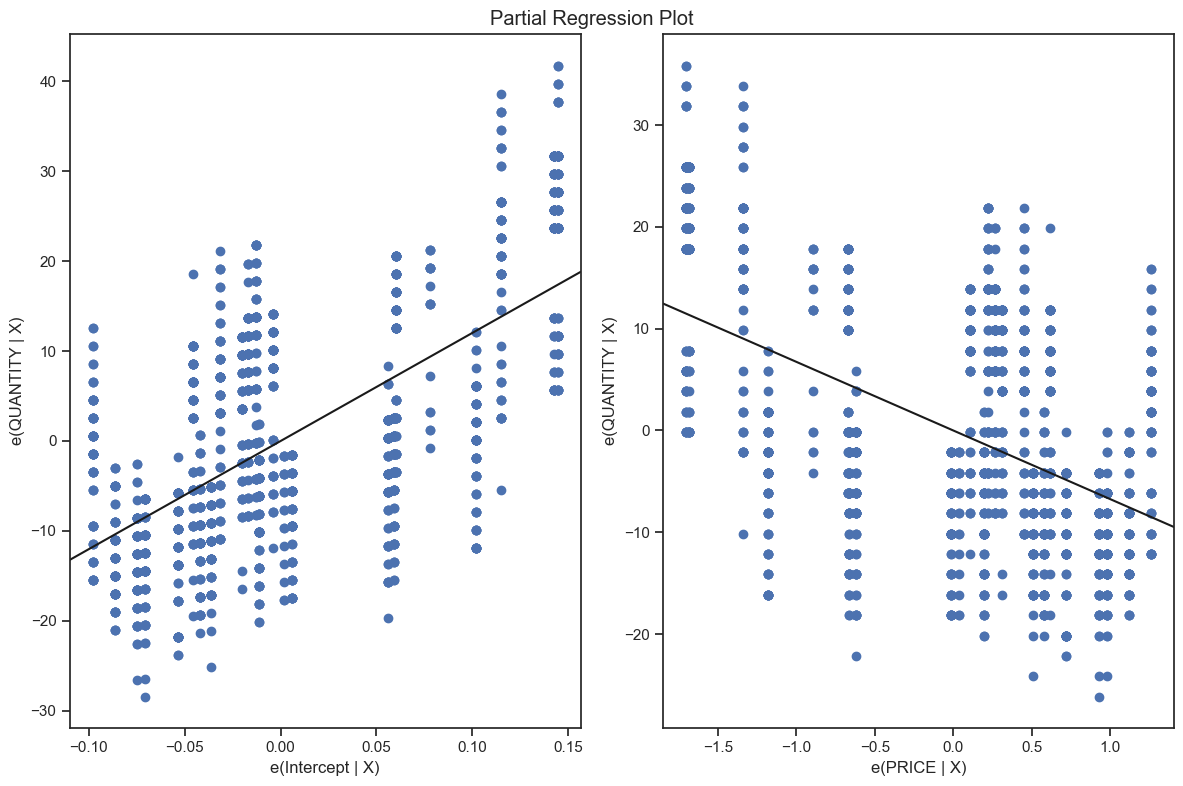

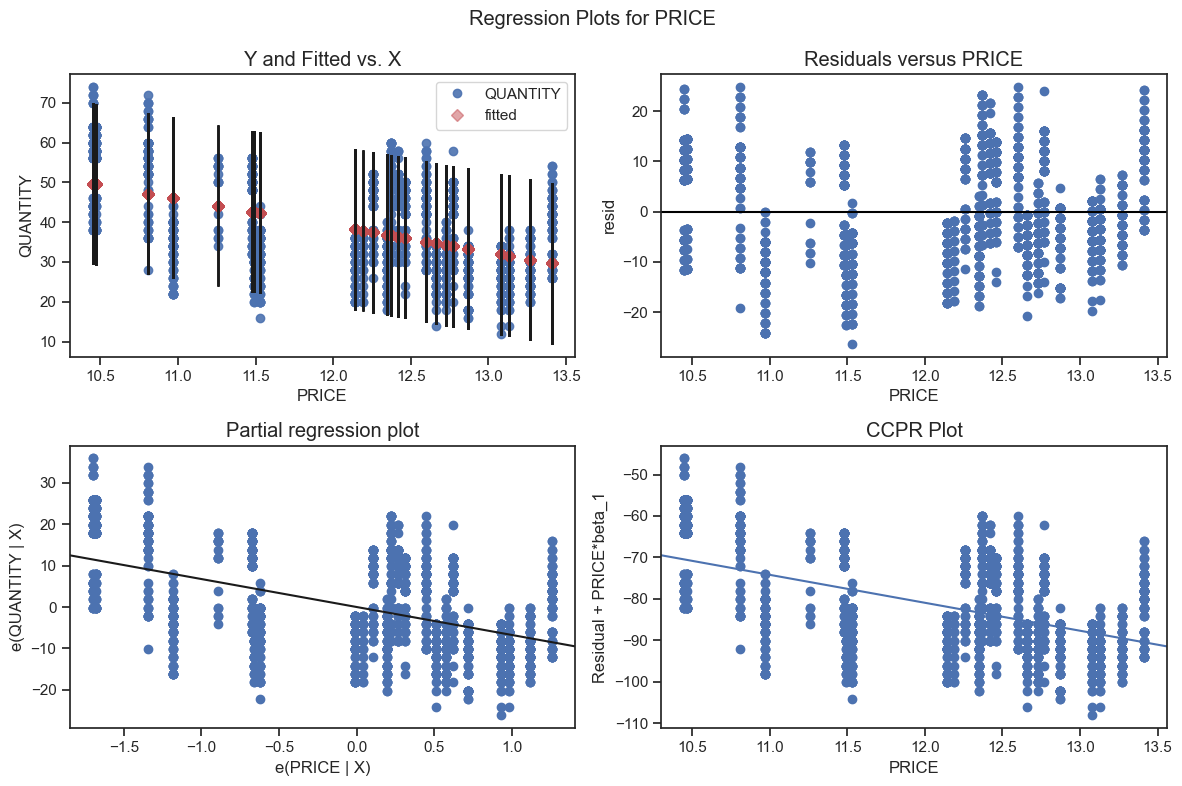

In [72]:
coke_model = ols("QUANTITY ~ PRICE", data=coke).fit()
print(coke_model.summary())
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_partregress_grid(coke_model, fig=fig)
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(coke_model, "PRICE", fig=fig)

SELL_ID  SELL_CATEGORY ITEM_NAME CALENDAR_DATE  PRICE  QUANTITY  YEAR  \
5022     2053              2    COFFEE       1/13/12  12.60        58  2012   
5023     2053              2    COFFEE       1/13/13  13.41        32  2013   
5024     2053              2    COFFEE       1/13/14  12.37        60  2014   
5025     2053              2    COFFEE       1/13/15  10.81        66  2015   
5026     2053              2    COFFEE       1/14/12  12.60        42  2012   

         HOLIDAY  IS_WEEKEND  IS_SCHOOLBREAK  AVERAGE_TEMPERATURE  IS_OUTDOOR  
5022  No Holiday           0               0                 26.6           0  
5023  No Holiday           1               0                 30.2           0  
5024  No Holiday           0               0                 28.4           0  
5025  No Holiday           0               0                 28.4           0  
5026  No Holiday           1               0                 23.0           0

(837, 12)

SELL_ID  SELL_CATEGORY       PRICE    QUANTITY         YEAR  \
count    837.0          837.0  837.000000  837.000000   837.000000   
mean    2053.0            2.0   11.934636   46.802867  2013.351254   
std        0.0            0.0    0.947643    9.909910     1.063043   
min     2053.0            2.0   10.450000   20.000000  2012.000000   
25%     2053.0            2.0   10.810000   40.000000  2012.000000   
50%     2053.0            2.0   12.370000   48.000000  2013.000000   
75%     2053.0            2.0   12.600000   54.000000  2014.000000   
max     2053.0            2.0   13.410000   74.000000  2015.000000   

       IS_WEEKEND  IS_SCHOOLBREAK  AVERAGE_TEMPERATURE  IS_OUTDOOR  
count  837.000000      837.000000           837.000000  837.000000  
mean     0.284349        0.200717            56.255914    0.878136  
std      0.451373        0.400776            20.005316    0.327324  
min      0.000000        0.000000            14.000000    0.000000  
25%      0.000000        0.000000            35.600000    1.000000  
50%      0.000000        0.000000            59.000000    1.000000  
75%      1.000000        0.000000            75.200000    1.000000  
max      1.000000        1.000000            87.800000    1.000000

<Axes: xlabel='PRICE', ylabel='QUANTITY'>

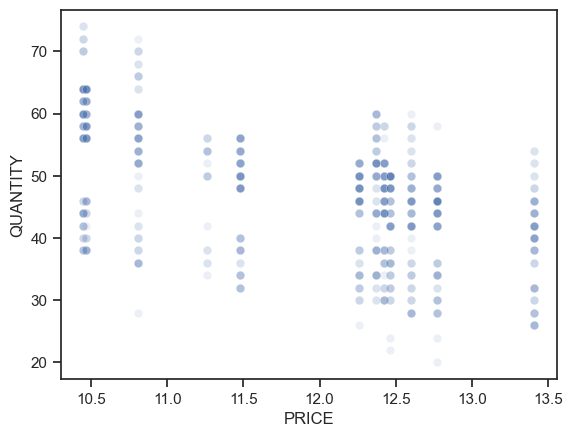

In [73]:
coffee = combined_data[combined_data['ITEM_NAME'] =='COFFEE']
coffee.head()
coffee.shape
coffee.describe()
sns.scatterplot(x = coffee.PRICE, y = coffee.QUANTITY, alpha = 0.1)

                            OLS Regression Results                            
Dep. Variable:               QUANTITY   R-squared:                       0.281
Model:                            OLS   Adj. R-squared:                  0.281
Method:                 Least Squares   F-statistic:                     327.0
Date:                Thu, 14 Nov 2024   Prob (F-statistic):           6.20e-62
Time:                        18:44:29   Log-Likelihood:                -2968.5
No. Observations:                 837   AIC:                             5941.
Df Residuals:                     835   BIC:                             5951.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    113.0116      3.673     30.770      0.0

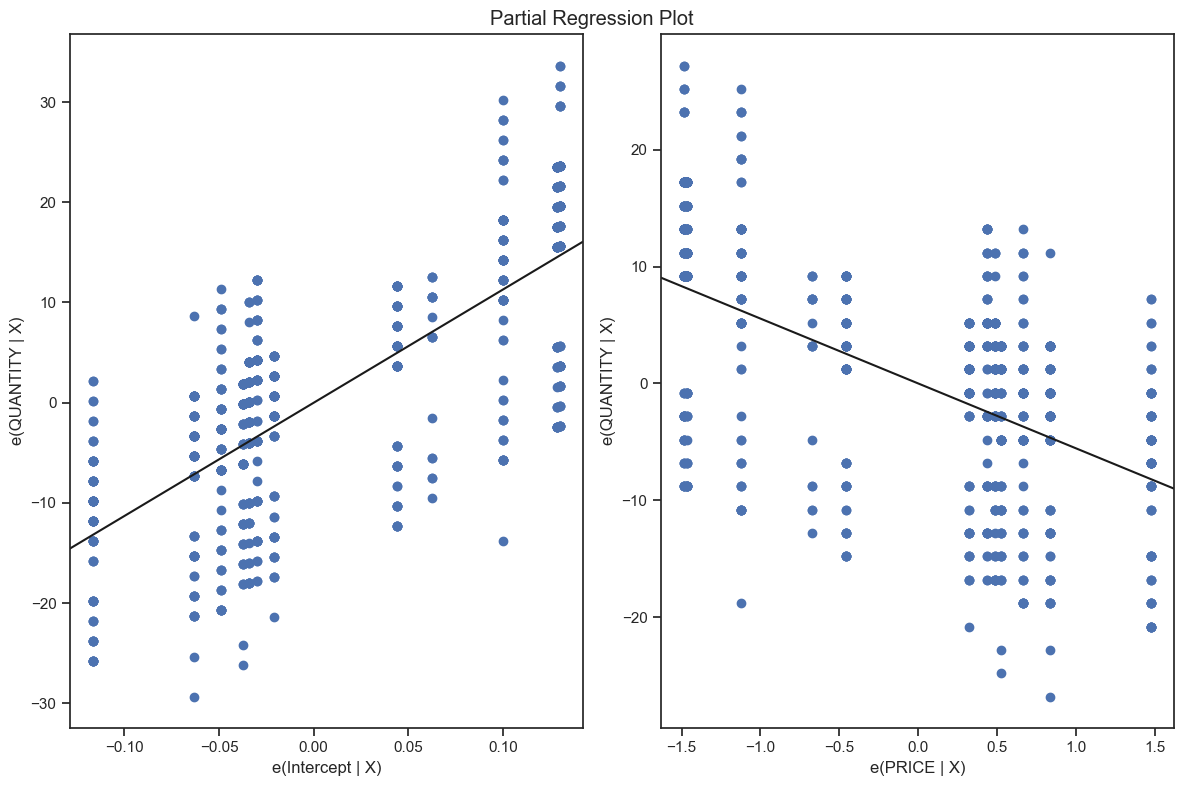

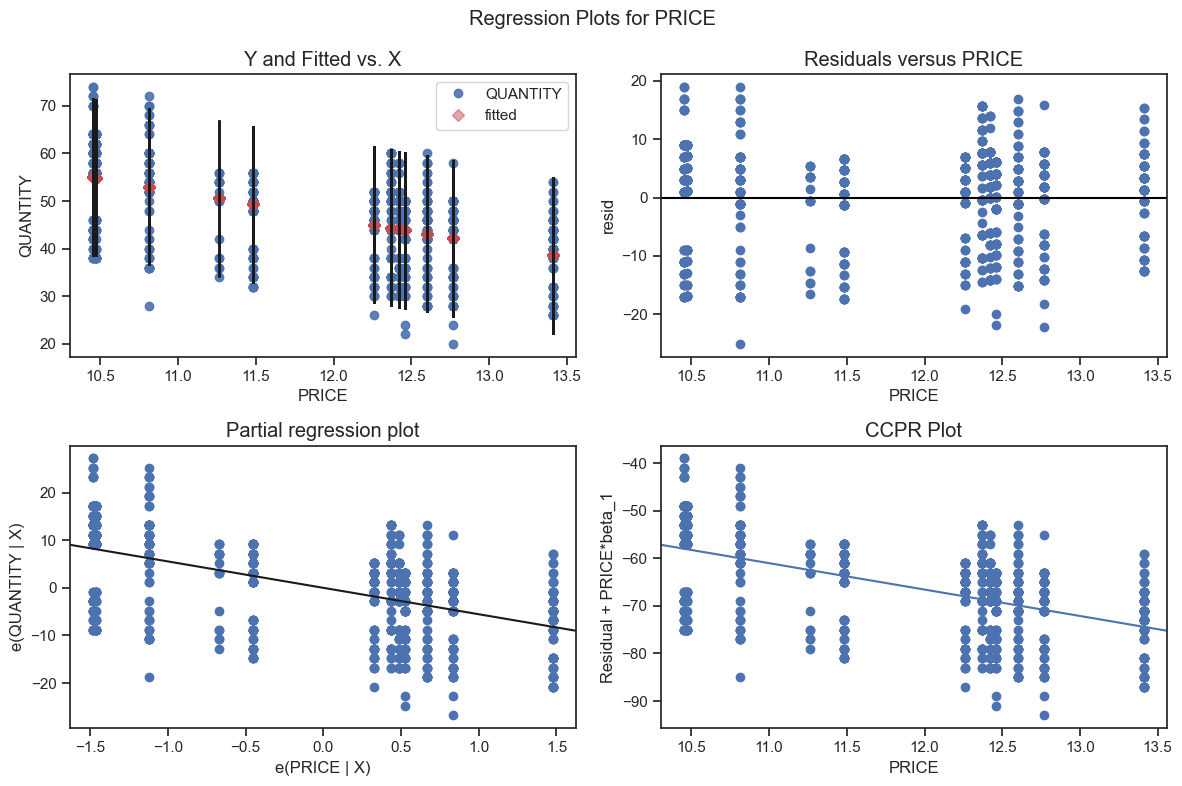

In [74]:
model = ols("QUANTITY ~ PRICE", data=coffee).fit()
print(model.summary())
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_partregress_grid(model, fig=fig)
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(model, 'PRICE', fig=fig)

SELL_ID  SELL_CATEGORY ITEM_NAME CALENDAR_DATE  PRICE  QUANTITY  YEAR  \
3348     2052              2  LEMONADE       1/13/12  12.75        26  2012   
3349     2052              2  LEMONADE       1/13/13  12.64        18  2013   
3350     2052              2  LEMONADE       1/13/14  11.96        24  2014   
3351     2052              2  LEMONADE       1/13/15  11.45        28  2015   
3352     2052              2  LEMONADE       1/14/12  12.75        20  2012   

         HOLIDAY  IS_WEEKEND  IS_SCHOOLBREAK  AVERAGE_TEMPERATURE  IS_OUTDOOR  
3348  No Holiday           0               0                 26.6           0  
3349  No Holiday           1               0                 30.2           0  
3350  No Holiday           0               0                 28.4           0  
3351  No Holiday           0               0                 28.4           0  
3352  No Holiday           1               0                 23.0           0

(837, 12)

SELL_ID  SELL_CATEGORY       PRICE    QUANTITY         YEAR  \
count    837.0          837.0  837.000000  837.000000   837.000000   
mean    2052.0            2.0   11.976918   20.910394  2013.351254   
std        0.0            0.0    0.820698    4.514501     1.063043   
min     2052.0            2.0   10.120000    8.000000  2012.000000   
25%     2052.0            2.0   11.360000   18.000000  2012.000000   
50%     2052.0            2.0   12.260000   20.000000  2013.000000   
75%     2052.0            2.0   12.720000   24.000000  2014.000000   
max     2052.0            2.0   12.850000   34.000000  2015.000000   

       IS_WEEKEND  IS_SCHOOLBREAK  AVERAGE_TEMPERATURE  IS_OUTDOOR  
count  837.000000      837.000000           837.000000  837.000000  
mean     0.284349        0.200717            56.255914    0.878136  
std      0.451373        0.400776            20.005316    0.327324  
min      0.000000        0.000000            14.000000    0.000000  
25%      0.000000        0.000000            35.600000    1.000000  
50%      0.000000        0.000000            59.000000    1.000000  
75%      1.000000        0.000000            75.200000    1.000000  
max      1.000000        1.000000            87.800000    1.000000

<Axes: xlabel='PRICE', ylabel='QUANTITY'>

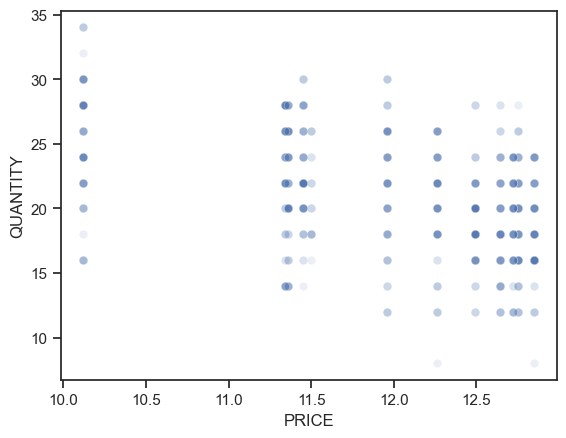

In [75]:
Lemonade_df = combined_data[combined_data['ITEM_NAME'] == 'LEMONADE']
Lemonade_df.head()
Lemonade_df.shape
Lemonade_df.describe()
sns.scatterplot(x = Lemonade_df.PRICE, y = Lemonade_df.QUANTITY , alpha = 0.1)

                            OLS Regression Results                            
Dep. Variable:               QUANTITY   R-squared:                       0.215
Model:                            OLS   Adj. R-squared:                  0.214
Method:                 Least Squares   F-statistic:                     228.7
Date:                Thu, 14 Nov 2024   Prob (F-statistic):           7.46e-46
Time:                        18:44:31   Log-Likelihood:                -2347.4
No. Observations:                 837   AIC:                             4699.
Df Residuals:                     835   BIC:                             4708.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     51.4615      2.025     25.416      0.0

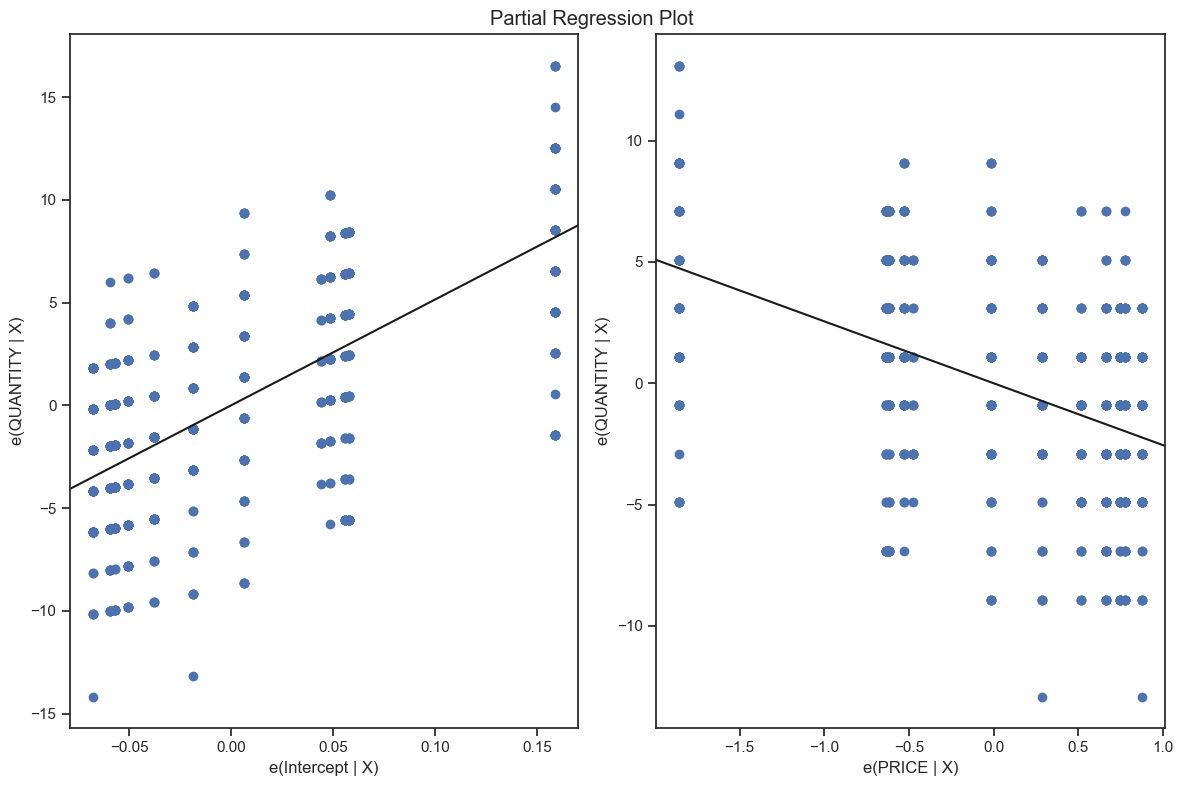

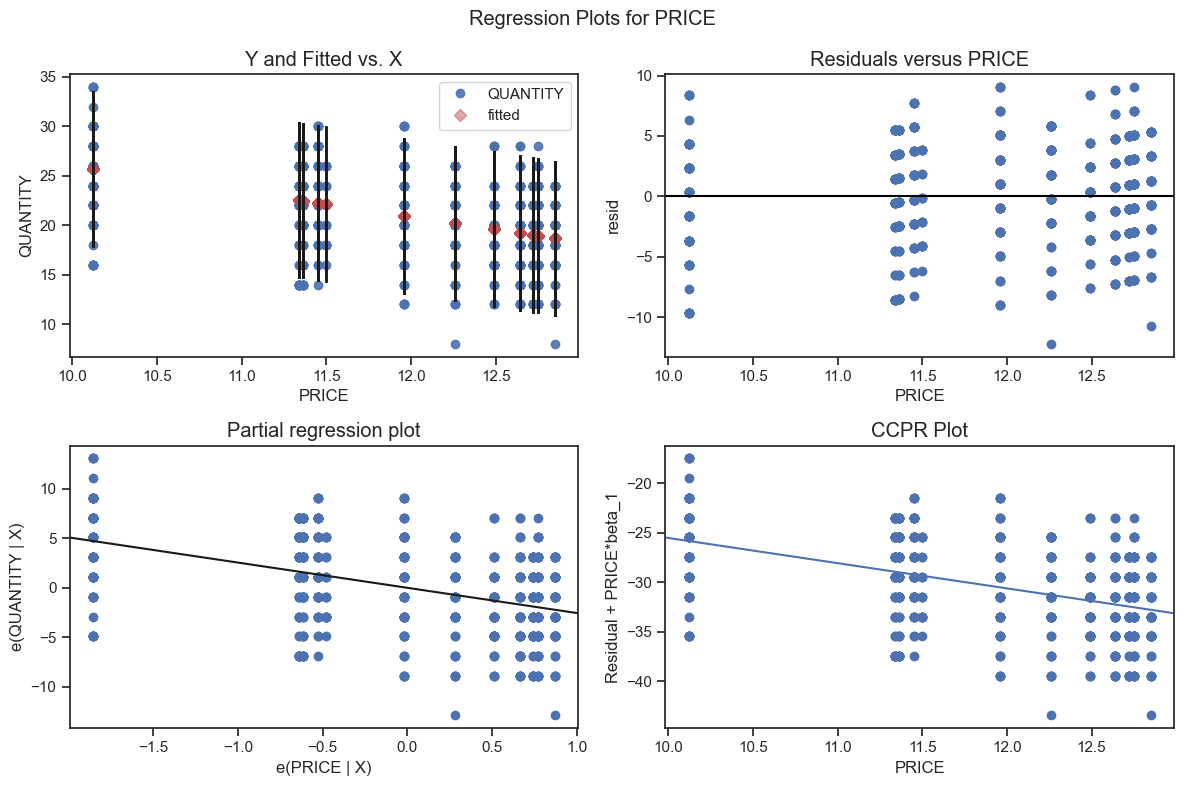

In [76]:
model = ols("QUANTITY ~ PRICE", data=Lemonade_df).fit()
print(model.summary())
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_partregress_grid(model, fig=fig)
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(model, 'PRICE', fig=fig)

In [77]:
elasticities = {}

In [78]:
def create_model_and_find_elasticity(data):
    model = ols("QUANTITY ~ PRICE", data).fit()
    price_elasticity = model.params[1]
    print('Price elasticity of the product: '+ str(price_elasticity))
    print(model.summary())
    fig = plt.figure(figsize=(12,8))
    fig = sm.graphics.plot_partregress_grid(model, fig=fig)
    return price_elasticity, model

Price elasticity of the product: -5.351266740100881
                            OLS Regression Results                            
Dep. Variable:               QUANTITY   R-squared:                       0.664
Model:                            OLS   Adj. R-squared:                  0.662
Method:                 Least Squares   F-statistic:                     320.1
Date:                Thu, 14 Nov 2024   Prob (F-statistic):           3.29e-40
Time:                        18:44:33   Log-Likelihood:                -391.92
No. Observations:                 164   AIC:                             787.8
Df Residuals:                     162   BIC:                             794.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------


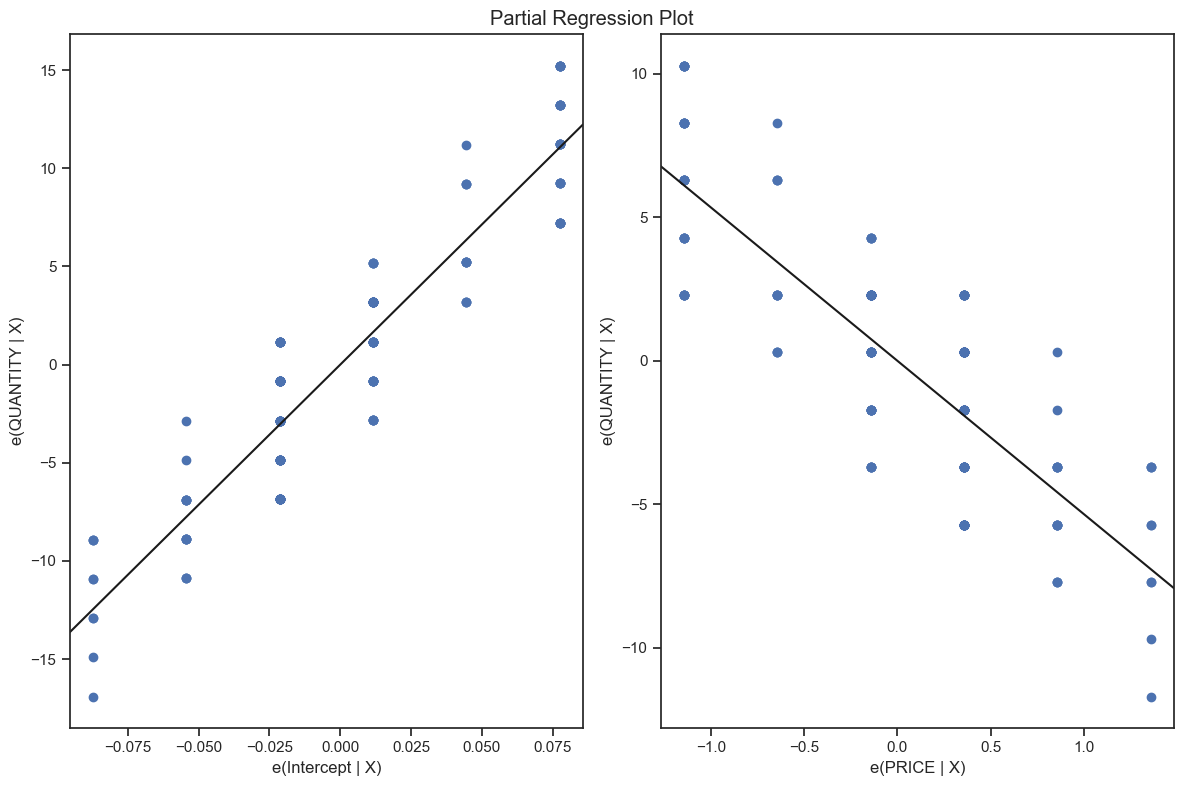

In [79]:
price_elasticity, model_burger_1070 = create_model_and_find_elasticity(burger_1070)
elasticities['burger_1070'] = price_elasticity

Price elasticity of the product: -1.353355848070377
                            OLS Regression Results                            
Dep. Variable:               QUANTITY   R-squared:                       0.119
Model:                            OLS   Adj. R-squared:                  0.113
Method:                 Least Squares   F-statistic:                     21.83
Date:                Thu, 14 Nov 2024   Prob (F-statistic):           6.22e-06
Time:                        18:44:34   Log-Likelihood:                -397.46
No. Observations:                 164   AIC:                             798.9
Df Residuals:                     162   BIC:                             805.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------


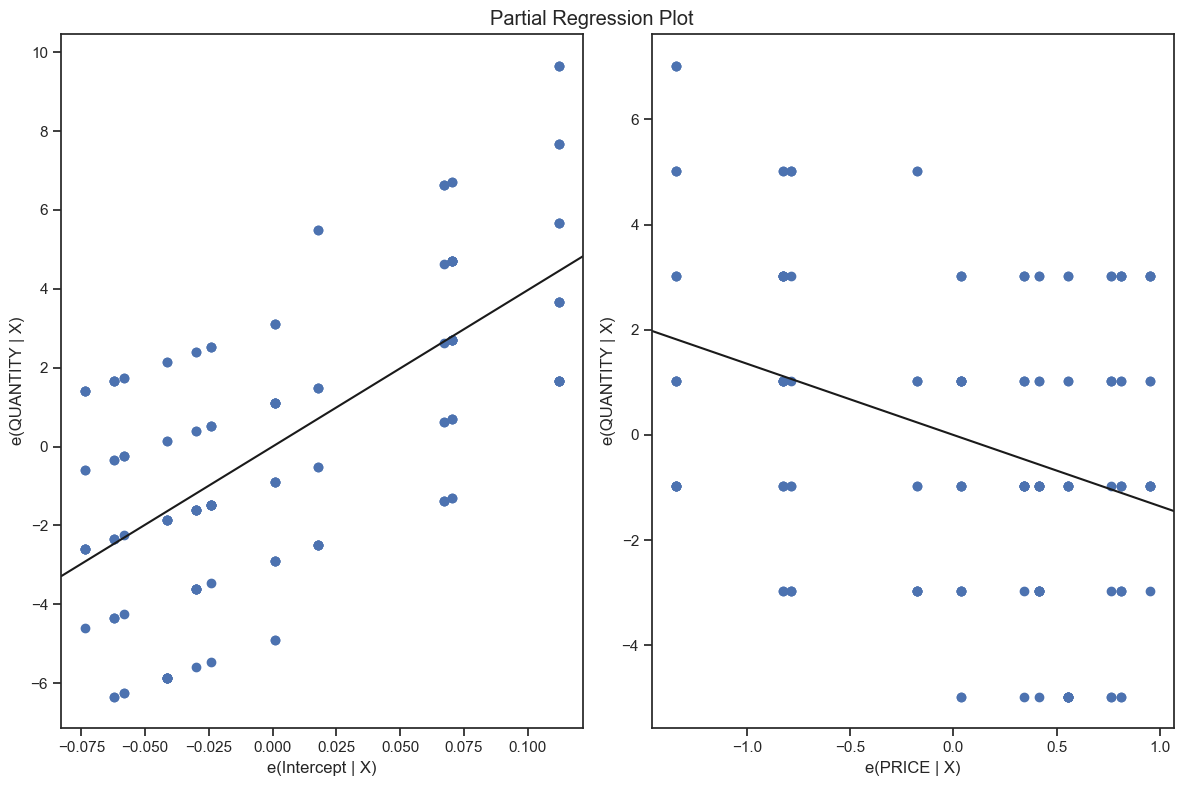

In [80]:
burger2051_data = bau2_data[(bau2_data['ITEM_NAME'] == "BURGER") & (bau2_data['SELL_ID'] == 2051)]
elasticities['burger_2051'], model_burger_2051 = create_model_and_find_elasticity(burger2051_data)

Price elasticity of the product: -1.6395517886297852
                            OLS Regression Results                            
Dep. Variable:               QUANTITY   R-squared:                       0.195
Model:                            OLS   Adj. R-squared:                  0.190
Method:                 Least Squares   F-statistic:                     39.31
Date:                Thu, 14 Nov 2024   Prob (F-statistic):           3.15e-09
Time:                        18:44:35   Log-Likelihood:                -405.10
No. Observations:                 164   AIC:                             814.2
Df Residuals:                     162   BIC:                             820.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------

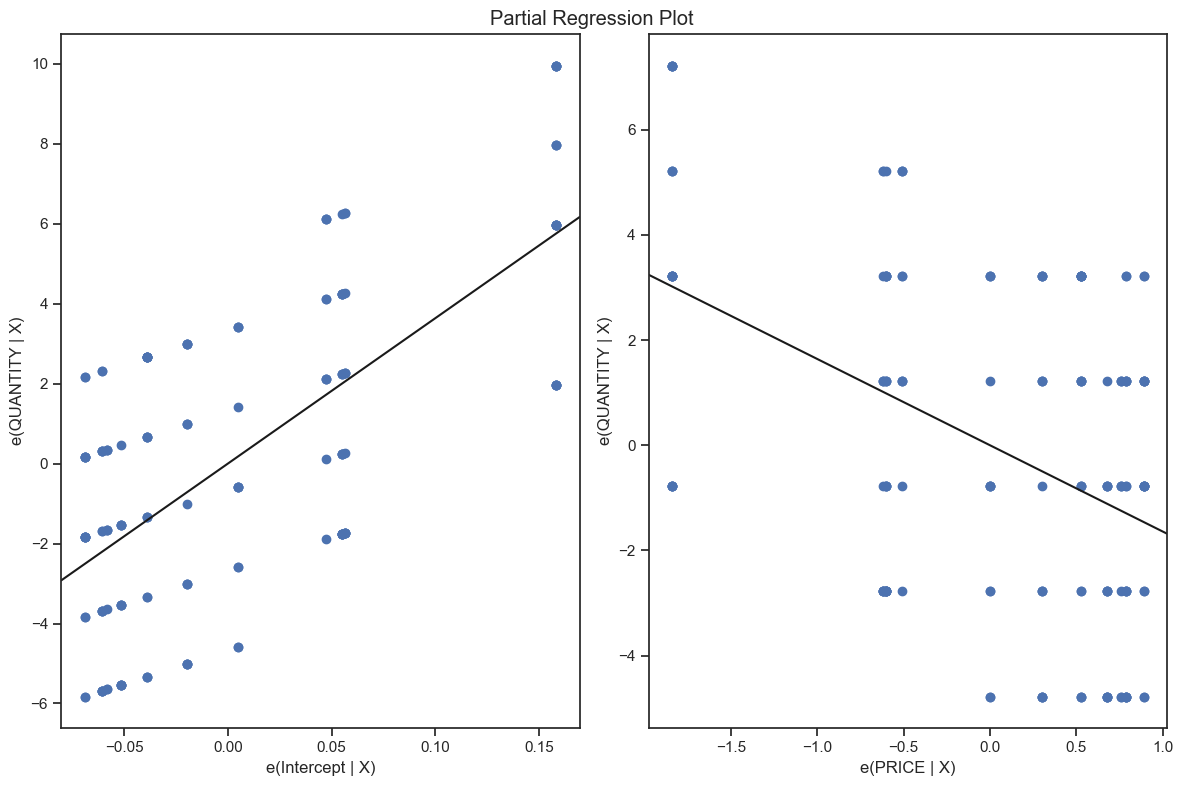

In [81]:
burger2052_data = bau2_data[(bau2_data['ITEM_NAME'] == "BURGER") & (bau2_data['SELL_ID'] == 2052)]
elasticities['burger_2052'], model_burger_2052 = create_model_and_find_elasticity(burger2052_data)

Price elasticity of the product: -4.394053351507928
                            OLS Regression Results                            
Dep. Variable:               QUANTITY   R-squared:                       0.683
Model:                            OLS   Adj. R-squared:                  0.682
Method:                 Least Squares   F-statistic:                     349.8
Date:                Thu, 14 Nov 2024   Prob (F-statistic):           2.58e-42
Time:                        18:44:36   Log-Likelihood:                -410.58
No. Observations:                 164   AIC:                             825.2
Df Residuals:                     162   BIC:                             831.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------


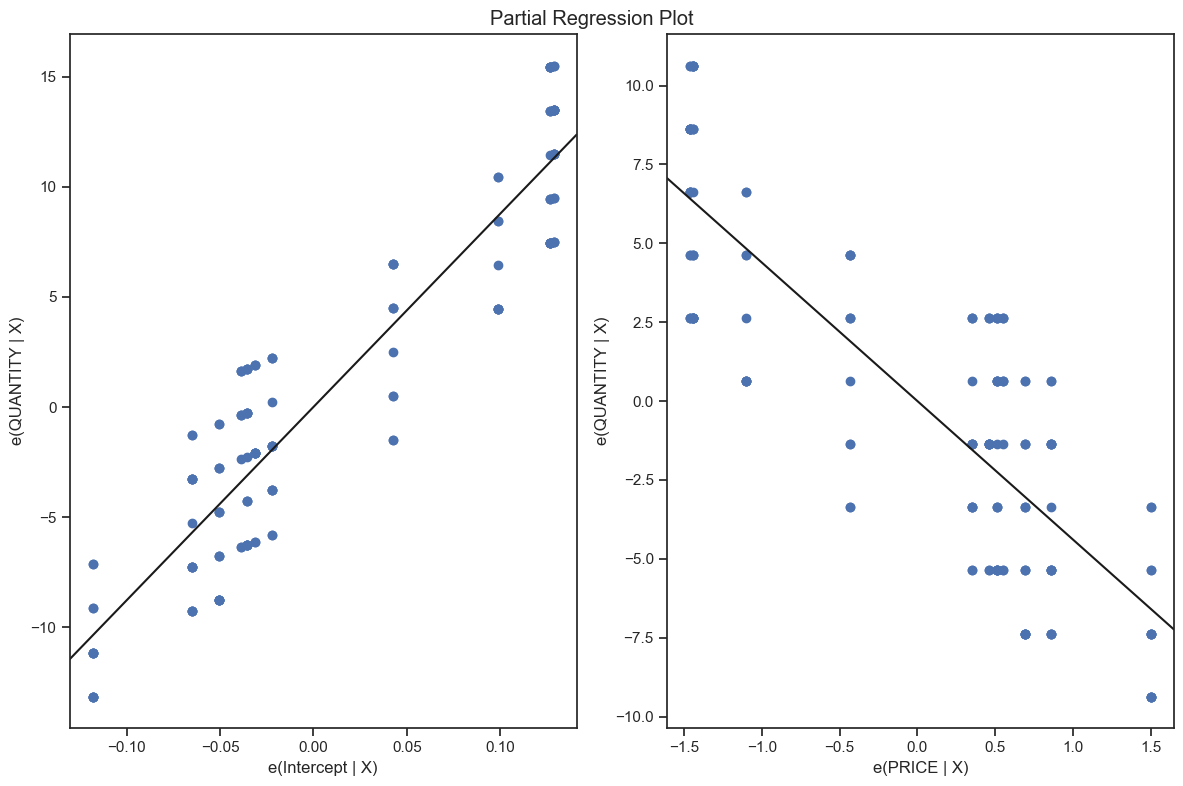

In [82]:
burger2053_data = bau2_data[(bau2_data['ITEM_NAME'] == "BURGER") & (bau2_data['SELL_ID'] == 2053)]
elasticities['burger_2053'], model_burger_2053 = create_model_and_find_elasticity(burger2053_data)                                                                   

Price elasticity of the product: -4.692643684745979
                            OLS Regression Results                            
Dep. Variable:               QUANTITY   R-squared:                       0.314
Model:                            OLS   Adj. R-squared:                  0.312
Method:                 Least Squares   F-statistic:                     149.2
Date:                Thu, 14 Nov 2024   Prob (F-statistic):           1.63e-28
Time:                        18:44:36   Log-Likelihood:                -1065.0
No. Observations:                 328   AIC:                             2134.
Df Residuals:                     326   BIC:                             2142.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------


(np.float64(-4.692643684745979),
 <statsmodels.regression.linear_model.RegressionResultsWrapper at 0x1833977bb00>)

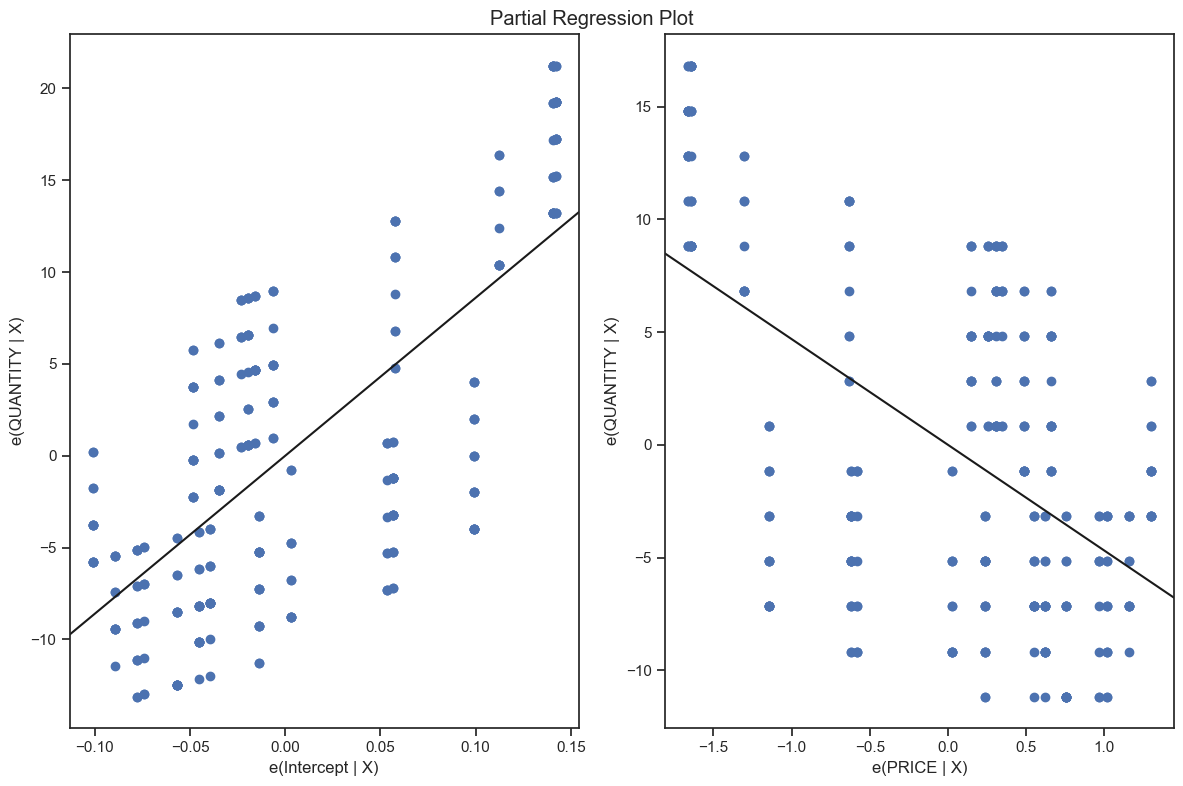

In [83]:
coke_data = bau2_data[bau2_data['ITEM_NAME'] == "COKE"]
create_model_and_find_elasticity(coke_data)

In [84]:
# No purchase of coke for sell id 3067
#coke_data = bau2_data[(bau2_data['ITEM_NAME'] == "COKE") & (bau2_data['SELL_ID'] == 3067)]
#elasticities['coke_3067'], model_coke_3067 = create_model_and_find_elasticity(coke_data)

In [85]:
#coke_data

Price elasticity of the product: -4.692643684745979
                            OLS Regression Results                            
Dep. Variable:               QUANTITY   R-squared:                       0.314
Model:                            OLS   Adj. R-squared:                  0.312
Method:                 Least Squares   F-statistic:                     149.2
Date:                Thu, 14 Nov 2024   Prob (F-statistic):           1.63e-28
Time:                        19:04:36   Log-Likelihood:                -1065.0
No. Observations:                 328   AIC:                             2134.
Df Residuals:                     326   BIC:                             2142.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------


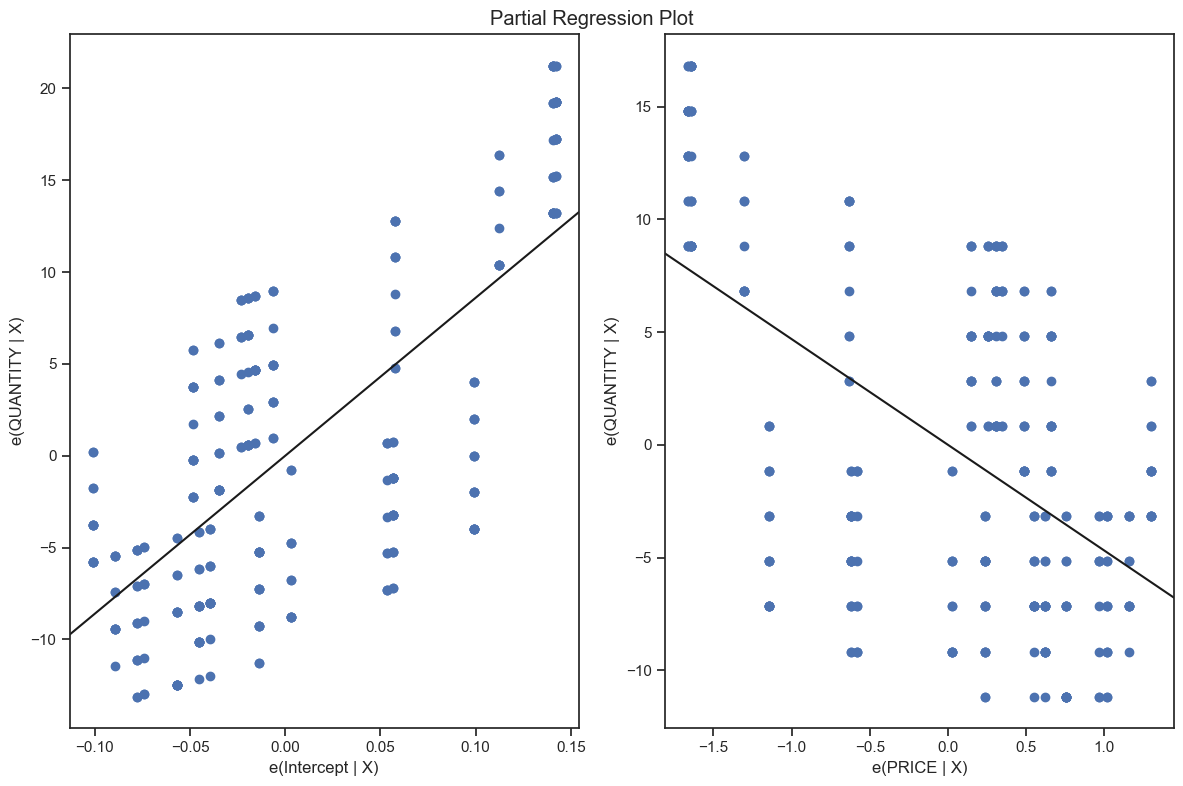

In [135]:
coke_data_2053 = bau2_data[(bau2_data['ITEM_NAME'] =="COKE") & (bau2_data['SELL_ID'] == 2053)]
elasticities['coke_2053'], model_coke_2053 = create_model_and_find_elasticity(coke_data)

Price elasticity of the product: -1.353355848070377
                            OLS Regression Results                            
Dep. Variable:               QUANTITY   R-squared:                       0.119
Model:                            OLS   Adj. R-squared:                  0.113
Method:                 Least Squares   F-statistic:                     21.83
Date:                Thu, 14 Nov 2024   Prob (F-statistic):           6.22e-06
Time:                        18:44:38   Log-Likelihood:                -397.46
No. Observations:                 164   AIC:                             798.9
Df Residuals:                     162   BIC:                             805.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------


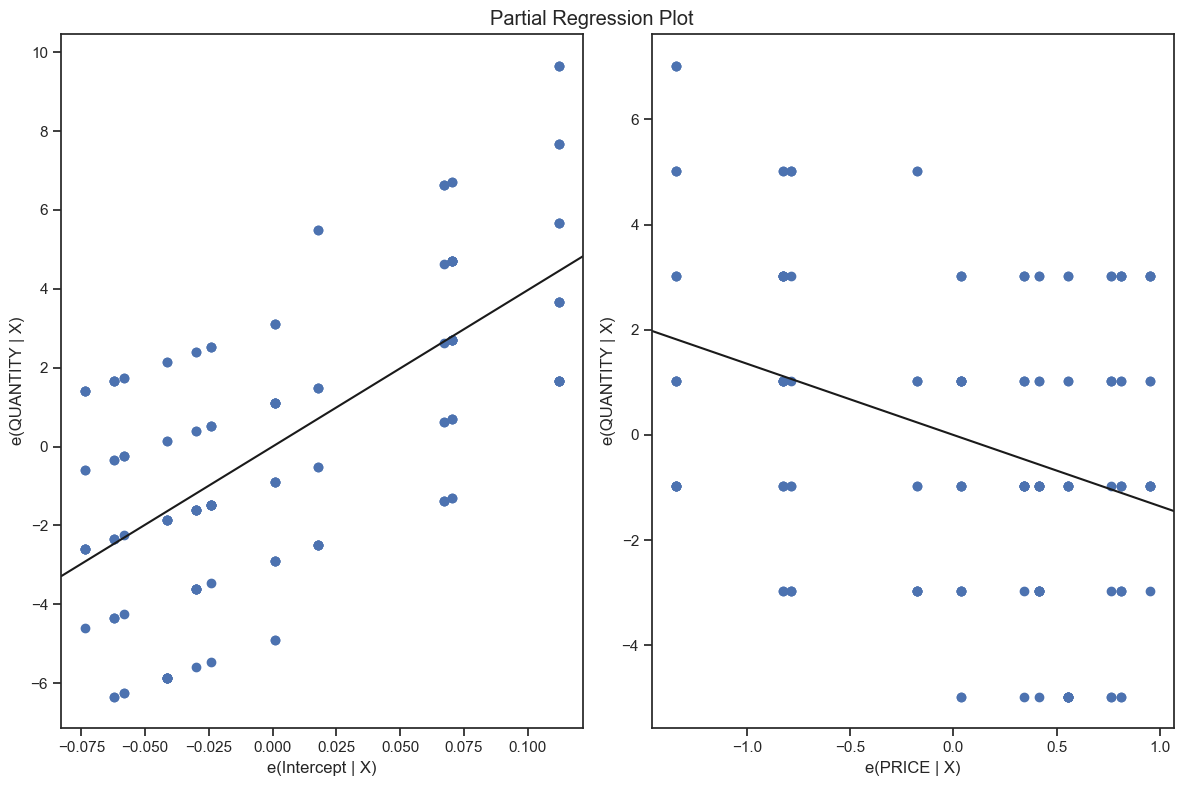

In [87]:
coke_data_2051 = bau2_data[(bau2_data['ITEM_NAME'] == "COKE") & (bau2_data['SELL_ID'] == 2051)]
elasticities['coke_2051'], model_coke_2051 = create_model_and_find_elasticity(coke_data_2051)

Price elasticity of the product: -1.6395517886297852
                            OLS Regression Results                            
Dep. Variable:               QUANTITY   R-squared:                       0.195
Model:                            OLS   Adj. R-squared:                  0.190
Method:                 Least Squares   F-statistic:                     39.31
Date:                Thu, 14 Nov 2024   Prob (F-statistic):           3.15e-09
Time:                        18:44:38   Log-Likelihood:                -405.10
No. Observations:                 164   AIC:                             814.2
Df Residuals:                     162   BIC:                             820.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------

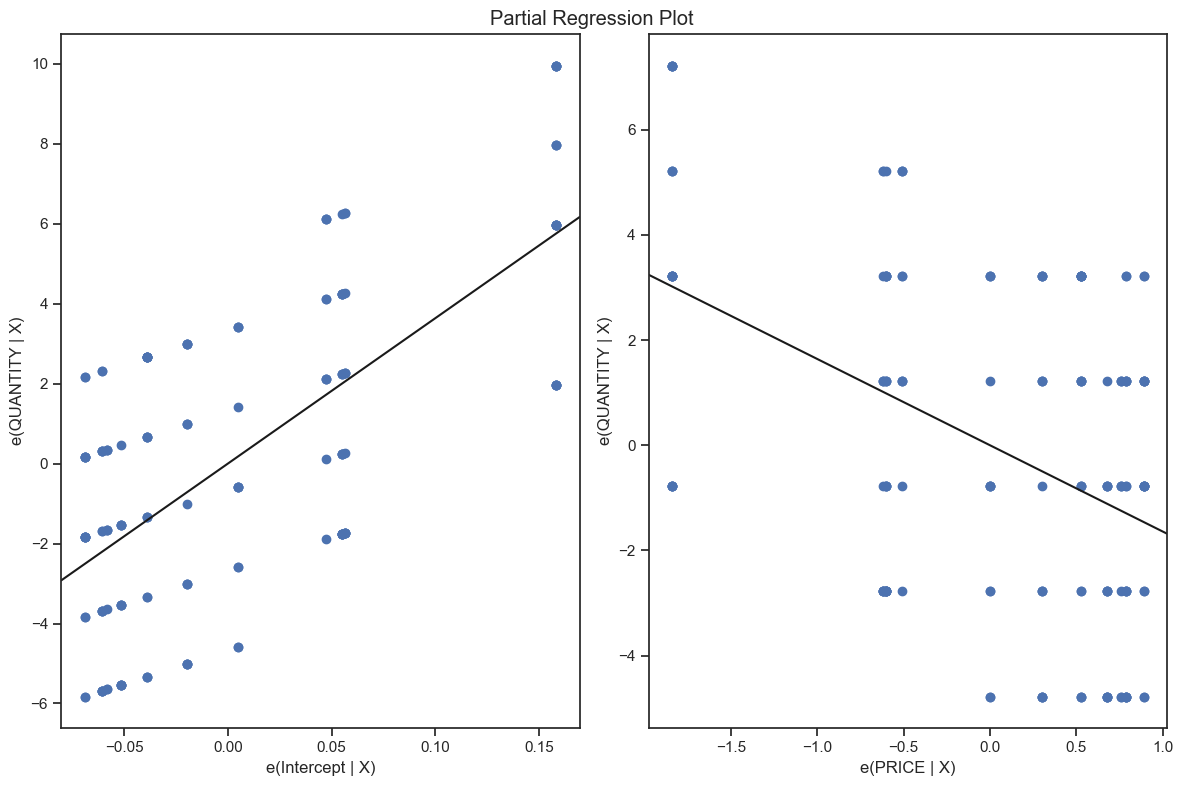

In [88]:
lemonade_data_2052 = bau2_data[(bau2_data['ITEM_NAME'] == "LEMONADE") & (bau2_data['SELL_ID'] ==2052)]
elasticities['lemonade_2052'], model_lemonade_2052 = create_model_and_find_elasticity(lemonade_data_2052)

In [89]:
# No transaction with this particular lemonade 3028
# Lemonade_data_3028 = bau2_data[(bau2_data['ITEM_NAME'] == "LEMONADE") & (bau2_data['SELL_ID'] == 3028)]
# elasticities['lemonade_3028'], model_lemonade_3028 = create_model_and_find_elasticity(lemonade_data_3028)

Price elasticity of the product: -4.394053351507928
                            OLS Regression Results                            
Dep. Variable:               QUANTITY   R-squared:                       0.683
Model:                            OLS   Adj. R-squared:                  0.682
Method:                 Least Squares   F-statistic:                     349.8
Date:                Thu, 14 Nov 2024   Prob (F-statistic):           2.58e-42
Time:                        18:44:39   Log-Likelihood:                -410.58
No. Observations:                 164   AIC:                             825.2
Df Residuals:                     162   BIC:                             831.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------


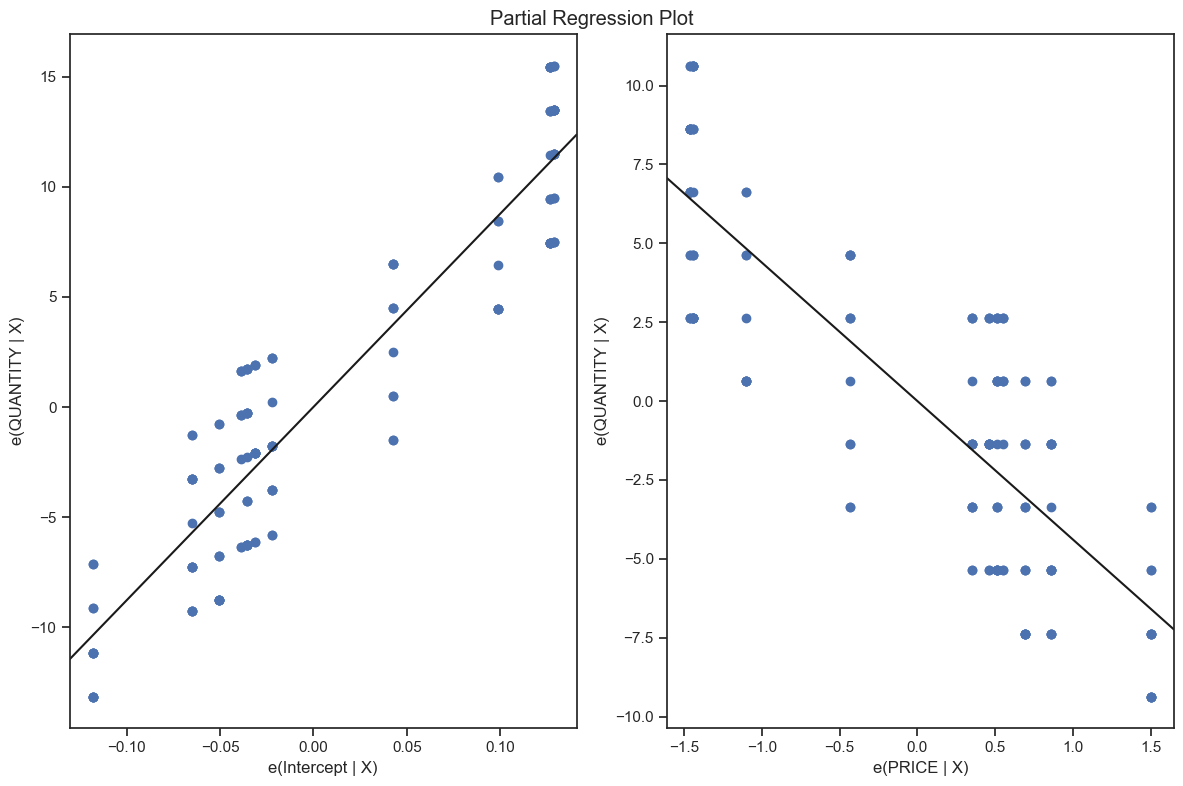

In [90]:
coffee_data_2053 = bau2_data[(bau2_data['ITEM_NAME'] =="COFFEE") & (bau2_data['SELL_ID'] == 2053)]
elasticities['coffee_2053'], model_coffee_2053 = create_model_and_find_elasticity(coffee_data_2053)

In [91]:
# No transaction for coffee with sell id 3055
# coffee_data_3055 = bau2_data[(bau2_data['ITEM_NAME'] == "COFFEE") & (bau2_data['SELL_ID'] == 3055)]
# elasticities['coffee_3055'], model_coffee_3055 = create_model_and_find_elasticity(coffee_data_3055)

## Listing the Elasticities in Table

In [92]:
elasticities

{'burger_1070': np.float64(-5.351266740100881),
 'burger_2051': np.float64(-1.353355848070377),
 'burger_2052': np.float64(-1.6395517886297852),
 'burger_2053': np.float64(-4.394053351507928),
 'coke_2053': np.float64(-4.692643684745979),
 'coke_2051': np.float64(-1.353355848070377),
 'lemonade_2052': np.float64(-1.6395517886297852),
 'coffee_2053': np.float64(-4.394053351507928)}

In [93]:
coke_data.PRICE.min()

np.float64(10.45)

In [94]:
coke_data.PRICE.max()

np.float64(13.41)

In [95]:
buying_price_coke = 9

#### cokedata.PROFIT = (cokedata.PRICE - buying_price_coke)*cokedata.QUANTITY

In [112]:
#random price points that makes sense
start_price = 9.5
end_price = 20

In [113]:
#test dataset
test = pd.DataFrame(columns= ["PRICE", "QUANTITY"])

In [114]:
# price in step of 0.01 and denominations increase in that sense
test["PRICE"] = np.arange(start_price, end_price, 0.01)

In [115]:
test["QUANTITY"] = model_coke_2051.predict(test["PRICE"])

In [116]:
test

PRICE   QUANTITY
0      9.50  26.785967
1      9.51  26.772433
2      9.52  26.758900
3      9.53  26.745366
4      9.54  26.731832
5      9.55  26.718299
6      9.56  26.704765
7      9.57  26.691232
8      9.58  26.677698
9      9.59  26.664165
10     9.60  26.650631
11     9.61  26.637097
12     9.62  26.623564
13     9.63  26.610030
14     9.64  26.596497
15     9.65  26.582963
16     9.66  26.569430
17     9.67  26.555896
18     9.68  26.542363
19     9.69  26.528829
20     9.70  26.515295
21     9.71  26.501762
22     9.72  26.488228
23     9.73  26.474695
24     9.74  26.461161
25     9.75  26.447628
26     9.76  26.434094
27     9.77  26.420561
28     9.78  26.407027
29     9.79  26.393493
30     9.80  26.379960
31     9.81  26.366426
32     9.82  26.352893
33     9.83  26.339359
34     9.84  26.325826
35     9.85  26.312292
36     9.86  26.298759
37     9.87  26.285225
38     9.88  26.271691
39     9.89  26.258158
40     9.90  26.244624
41     9.91  26.231091
42     9.92  26.217557
43     9.93  26.204024
44     9.94  26.190490
45     9.95  26.176957
46     9.96  26.163423
47     9.97  26.149889
48     9.98  26.136356
49     9.99  26.122822
50    10.00  26.109289
51    10.01  26.095755
52    10.02  26.082222
53    10.03  26.068688
54    10.04  26.055154
55    10.05  26.041621
56    10.06  26.028087
57    10.07  26.014554
58    10.08  26.001020
59    10.09  25.987487
60    10.10  25.973953
61    10.11  25.960420
62    10.12  25.946886
63    10.13  25.933352
64    10.14  25.919819
65    10.15  25.906285
66    10.16  25.892752
67    10.17  25.879218
68    10.18  25.865685
69    10.19  25.852151
70    10.20  25.838618
71    10.21  25.825084
72    10.22  25.811550
73    10.23  25.798017
74    10.24  25.784483
75    10.25  25.770950
76    10.26  25.757416
77    10.27  25.743883
78    10.28  25.730349
79    10.29  25.716816
80    10.30  25.703282
81    10.31  25.689748
82    10.32  25.676215
83    10.33  25.662681
84    10.34  25.649148
85    10.35  25.635614
86    10.36  25.622081
87    10.37  25.608547
88    10.38  25.595013
89    10.39  25.581480
90    10.40  25.567946
91    10.41  25.554413
92    10.42  25.540879
93    10.43  25.527346
94    10.44  25.513812
95    10.45  25.500279
96    10.46  25.486745
97    10.47  25.473211
98    10.48  25.459678
99    10.49  25.446144
100   10.50  25.432611
101   10.51  25.419077
102   10.52  25.405544
103   10.53  25.392010
104   10.54  25.378477
105   10.55  25.364943
106   10.56  25.351409
107   10.57  25.337876
108   10.58  25.324342
109   10.59  25.310809
110   10.60  25.297275
111   10.61  25.283742
112   10.62  25.270208
113   10.63  25.256675
114   10.64  25.243141
115   10.65  25.229607
116   10.66  25.216074
117   10.67  25.202540
118   10.68  25.189007
119   10.69  25.175473
120   10.70  25.161940
121   10.71  25.148406
122   10.72  25.134873
123   10.73  25.121339
124   10.74  25.107805
125   10.75  25.094272
126   10.76  25.080738
127   10.77  25.067205
128   10.78  25.053671
129   10.79  25.040138
130   10.80  25.026604
131   10.81  25.013070
132   10.82  24.999537
133   10.83  24.986003
134   10.84  24.972470
135   10.85  24.958936
136   10.86  24.945403
137   10.87  24.931869
138   10.88  24.918336
139   10.89  24.904802
140   10.90  24.891268
141   10.91  24.877735
142   10.92  24.864201
143   10.93  24.850668
144   10.94  24.837134
145   10.95  24.823601
146   10.96  24.810067
147   10.97  24.796534
148   10.98  24.783000
149   10.99  24.769466
150   11.00  24.755933
151   11.01  24.742399
152   11.02  24.728866
153   11.03  24.715332
154   11.04  24.701799
155   11.05  24.688265
156   11.06  24.674732
157   11.07  24.661198
158   11.08  24.647664
159   11.09  24.634131
160   11.10  24.620597
161   11.11  24.607064
162   11.12  24.593530
163   11.13  24.579997
164   11.14  24.566463
165   11.15  24.552929
166   11.16  24.539396
167   11.17  24.525862
168   11.18  24.512329
169   11.19  24.498795
170   11.20  24.485262
171   11.21  24.471728
172   11.22  24.458195
173 

In [117]:
#profit
test['PROFIT'] = (test["PRICE"] - buying_price_coke) * test['QUANTITY']

In [118]:
test

PRICE   QUANTITY      PROFIT
0      9.50  26.785967   13.392983
1      9.51  26.772433   13.653941
2      9.52  26.758900   13.914628
3      9.53  26.745366   14.175044
4      9.54  26.731832   14.435190
5      9.55  26.718299   14.695064
6      9.56  26.704765   14.954669
7      9.57  26.691232   15.214002
8      9.58  26.677698   15.473065
9      9.59  26.664165   15.731857
10     9.60  26.650631   15.990379
11     9.61  26.637097   16.248629
12     9.62  26.623564   16.506610
13     9.63  26.610030   16.764319
14     9.64  26.596497   17.021758
15     9.65  26.582963   17.278926
16     9.66  26.569430   17.535824
17     9.67  26.555896   17.792450
18     9.68  26.542363   18.048807
19     9.69  26.528829   18.304892
20     9.70  26.515295   18.560707
21     9.71  26.501762   18.816251
22     9.72  26.488228   19.071524
23     9.73  26.474695   19.326527
24     9.74  26.461161   19.581259
25     9.75  26.447628   19.835721
26     9.76  26.434094   20.089912
27     9.77  26.420561   20.343832
28     9.78  26.407027   20.597481
29     9.79  26.393493   20.850860
30     9.80  26.379960   21.103968
31     9.81  26.366426   21.356805
32     9.82  26.352893   21.609372
33     9.83  26.339359   21.861668
34     9.84  26.325826   22.113694
35     9.85  26.312292   22.365448
36     9.86  26.298759   22.616932
37     9.87  26.285225   22.868146
38     9.88  26.271691   23.119088
39     9.89  26.258158   23.369760
40     9.90  26.244624   23.620162
41     9.91  26.231091   23.870293
42     9.92  26.217557   24.120153
43     9.93  26.204024   24.369742
44     9.94  26.190490   24.619061
45     9.95  26.176957   24.868109
46     9.96  26.163423   25.116886
47     9.97  26.149889   25.365393
48     9.98  26.136356   25.613629
49     9.99  26.122822   25.861594
50    10.00  26.109289   26.109289
51    10.01  26.095755   26.356713
52    10.02  26.082222   26.603866
53    10.03  26.068688   26.850749
54    10.04  26.055154   27.097361
55    10.05  26.041621   27.343702
56    10.06  26.028087   27.589773
57    10.07  26.014554   27.835573
58    10.08  26.001020   28.081102
59    10.09  25.987487   28.326360
60    10.10  25.973953   28.571348
61    10.11  25.960420   28.816066
62    10.12  25.946886   29.060512
63    10.13  25.933352   29.304688
64    10.14  25.919819   29.548594
65    10.15  25.906285   29.792228
66    10.16  25.892752   30.035592
67    10.17  25.879218   30.278685
68    10.18  25.865685   30.521508
69    10.19  25.852151   30.764060
70    10.20  25.838618   31.006341
71    10.21  25.825084   31.248352
72    10.22  25.811550   31.490092
73    10.23  25.798017   31.731561
74    10.24  25.784483   31.972759
75    10.25  25.770950   32.213687
76    10.26  25.757416   32.454344
77    10.27  25.743883   32.694731
78    10.28  25.730349   32.934847
79    10.29  25.716816   33.174692
80    10.30  25.703282   33.414267
81    10.31  25.689748   33.653570
82    10.32  25.676215   33.892604
83    10.33  25.662681   34.131366
84    10.34  25.649148   34.369858
85    10.35  25.635614   34.608079
86    10.36  25.622081   34.846030
87    10.37  25.608547   35.083709
88    10.38  25.595013   35.321119
89    10.39  25.581480   35.558257
90    10.40  25.567946   35.795125
91    10.41  25.554413   36.031722
92    10.42  25.540879   36.268049
93    10.43  25.527346   36.504104
94    10.44  25.513812   36.739889
95    10.45  25.500279   36.975404
96    10.46  25.486745   37.210648
97    10.47  25.473211   37.445621
98    10.48  25.459678   37.680323
99    10.49  25.446144   37.914755
100   10.50  25.432611   38.148916
101   10.51  25.419077   38.382807
102   10.52  25.405544   38.616426
103   10.53  25.392010   38.849775
104   10.54  25.378477   39.082854
105   10.55  25.364943   39.315662
106   10.56  25.351409   39.548199
107   10.57  25.337876   39.780465
108   10.58  25.324342   40.012461
109   10.59  25.310809   40.244186
110   10.60  25.297275   40.475640
111   10.61  25.283742   40.706824
112   10.62  25.270208   40.937737
113   10.63  25.

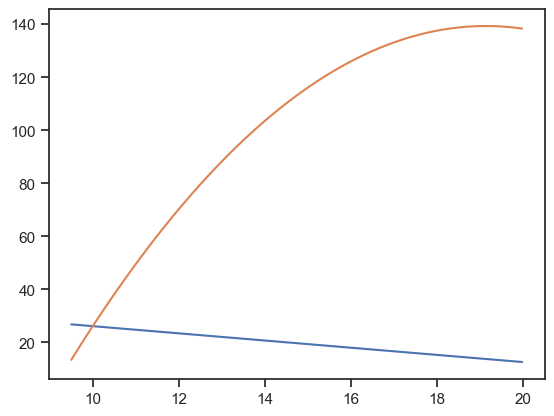

In [119]:
#lets visualize the tabular from abive
plt.plot(test['PRICE'], test['QUANTITY'])
plt.plot(test['PRICE'], test['PROFIT'])
plt.show()

In [120]:
ind = np.where(test['PROFIT'] == test['PROFIT'].max())[0][0]

In [121]:
test.loc[[ind]]

PRICE   QUANTITY      PROFIT
965  19.15  13.726083  139.319739

In [125]:
#Generic fuction for optimal price
#define a function for finding the optimal price
def find_optimal_price(data, model, buying_price):
    start_price = data.PRICE.min() - 1
    end_price = data.PRICE.min() + 10
    test = pd.DataFrame(columns = ["PRICE", "QUANTITY"])
    test['PRICE'] = np.arange(start_price, end_price,0.01)
    test['QUANTITY'] = model.predict(test['PRICE'])
    test['PROFIT'] = (test["PRICE"] - buying_price) * test["QUANTITY"]
    plt.plot(test['PRICE'],test['QUANTITY'])
    plt.plot(test['PRICE'],test['PROFIT'])
    plt.show()
    ind = np.where(test['PROFIT'] == test['PROFIT'].max())[0][0]
    values_at_max_profit = test.iloc[[ind]]
    return values_at_max_profit

#### Calculate the optimal price for all and list in table

In [126]:
optimal_price = {}
buying_price = 9

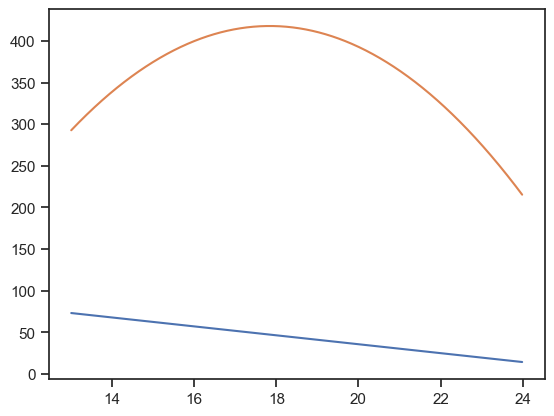

In [127]:
optimal_price['burger_1070'] = find_optimal_price(burger_1070, model_burger_1070, buying_price)

In [128]:
optimal_price

{'burger_1070':      PRICE   QUANTITY      PROFIT
 484  17.84  47.276517  417.924409}

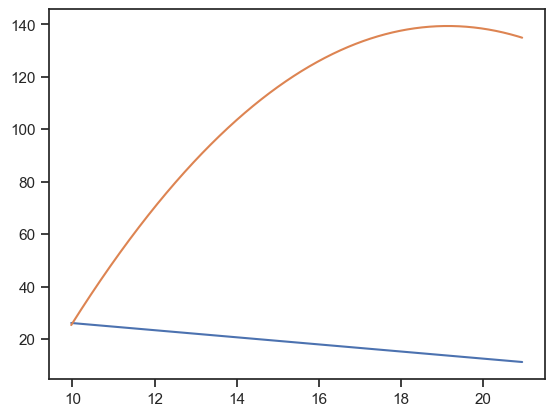

In [129]:
optimal_price['burger_2051'] = find_optimal_price(burger2051_data, model_burger_2051, buying_price)

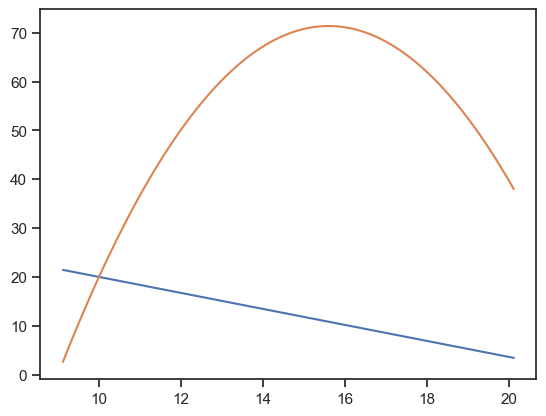

In [130]:
optimal_price['burger_2052'] = find_optimal_price(burger2052_data, model_burger_2052, buying_price)

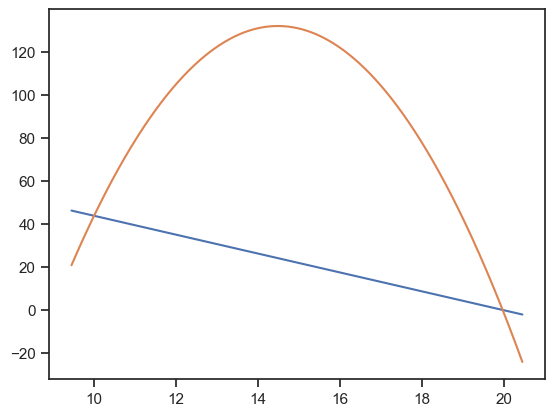

In [131]:
optimal_price['burger_2053'] = find_optimal_price(burger2053_data, model_burger_2053, buying_price)

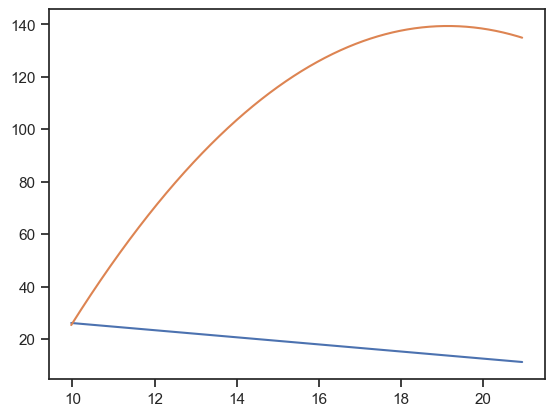

In [133]:
optimal_price['coke_2051'] = find_optimal_price(coke_data_2051, model_coke_2051, buying_price)

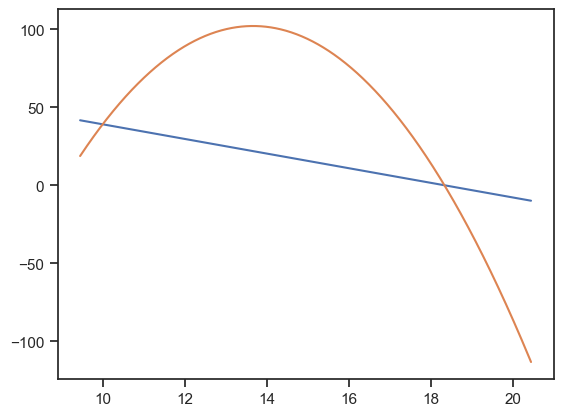

In [136]:
optimal_price['coke_2053'] = find_optimal_price(coke_data_2053, model_coke_2053, buying_price)

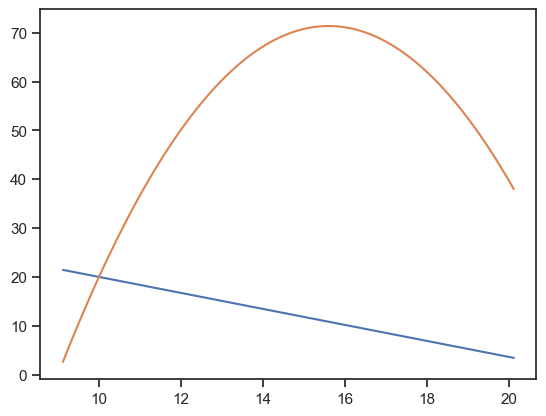

In [137]:
optimal_price['lemonade_2052'] = find_optimal_price(lemonade_data_2052, model_lemonade_2052, buying_price)

In [138]:
optimal_price

{'burger_1070':      PRICE   QUANTITY      PROFIT
 484  17.84  47.276517  417.924409,
 'burger_2051':      PRICE   QUANTITY      PROFIT
 918  19.15  13.726083  139.319739,
 'burger_2052':      PRICE   QUANTITY     PROFIT
 648   15.6  10.812419  71.361968,
 'burger_2053':      PRICE   QUANTITY      PROFIT
 503  14.48  24.074744  131.929598,
 'coke_2051':      PRICE   QUANTITY      PROFIT
 918  19.15  13.726083  139.319739,
 'coke_2053':      PRICE   QUANTITY      PROFIT
 421  13.66  21.910869  102.104648,
 'lemonade_2052':      PRICE   QUANTITY     PROFIT
 648   15.6  10.812419  71.361968}

In [139]:
coke_data_2051.PRICE.describe()

count    164.000000
mean      12.315488
std        0.743054
min       10.970000
25%       11.530000
50%       12.660000
75%       12.870000
max       13.270000
Name: PRICE, dtype: float64